This document will hold every figure that is shown in the report with the code that was used to generate said figure.


# Imports

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer, plot_histogram
from qiskit.circuit.library import UnitaryGate
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from scipy.linalg import expm
from scipy.optimize import curve_fit
from openfermion.ops import FermionOperator
from openfermion.linalg import get_sparse_operator

import custom_gate
import phase_estimation
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D 
import numpy as np
import qiskit.quantum_info as qi
import seaborn as sns

# Figure 2.1

Figure saved to figures\uniformly_controlled.png
LaTeX code saved to circuits\uniformly_controlled.tex


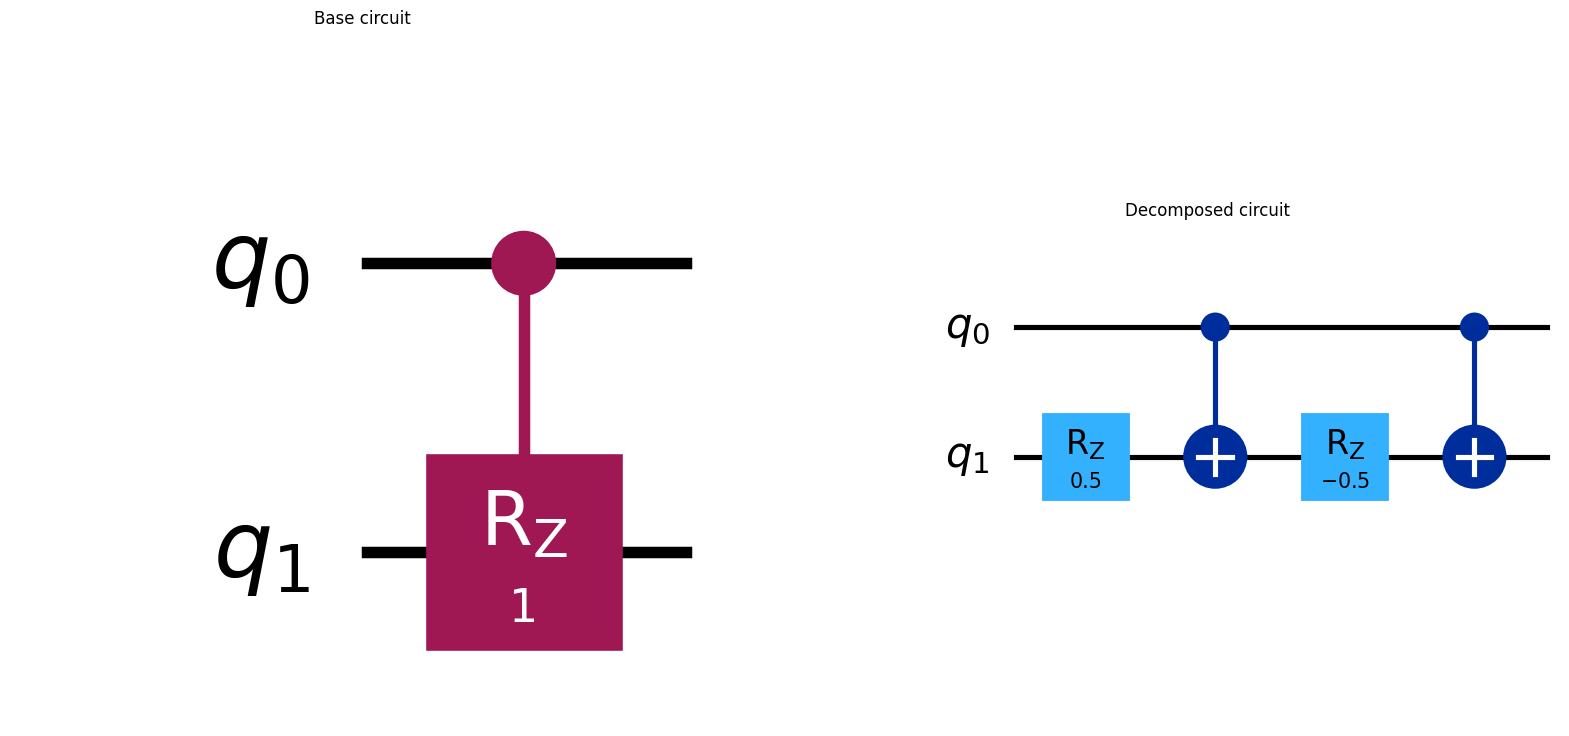

In [3]:

qc = QuantumCircuit(2)

qc.crz(1,0,1)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

qc.draw(output='mpl', ax=axes[0])
qc.decompose().draw(output='mpl', ax=axes[1])
axes[0].set_title("Base circuit")
axes[1].set_title("Decomposed circuit")


os.makedirs("figures", exist_ok=True)
file_path = os.path.join("figures", "uniformly_controlled.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = qc.decompose().draw(output='latex_source')
file_path_latex = os.path.join("circuits", "uniformly_controlled.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")


# Figure 4.1

Figure saved to figures\F_gate.png
LaTeX code saved to circuits\F_gate.tex
[[ 1.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.71+0.j  0.71+0.j  0.  +0.j]
 [ 0.  +0.j  0.71+0.j -0.71+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j -1.  +0.j]]


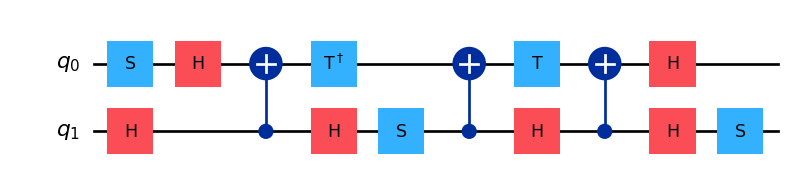

In [ ]:

# F gate
qc = QuantumCircuit(2)

qc.append(custom_gate.F(), [0, 1])
decomposed_circuit = qc.decompose()

fig, axes = plt.subplots(figsize=(10, 5))
decomposed_circuit.draw(output='mpl', ax=axes)

os.makedirs("figures", exist_ok=True)
file_path = os.path.join("figures", "F_gate.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = decomposed_circuit.draw(output='latex_source')
file_path_latex = os.path.join("circuits", "F_gate.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")

op = qi.Operator(qc)
circuit_mat_a=op.data
print(circuit_mat_a.round(2))



# Figure 4.2

Figure saved to figures\double_rotation.png
LaTeX code saved to circuits\double_rotation.tex
[[ 1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j   -0.42+0.j    0.  +0.91j  0.  +0.j  ]
 [ 0.  +0.j    0.  +0.91j -0.42+0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    1.  +0.j  ]]


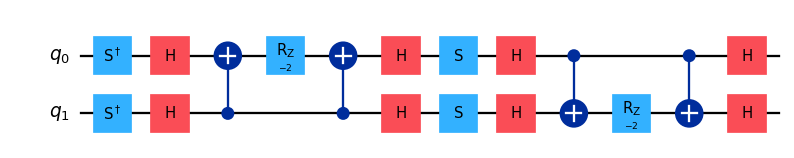

In [ ]:
t=1
tau=1
qc = QuantumCircuit(2)

# Y ⊗ Y part
# Transformation Y to Z
qc.sdg(0)
qc.sdg(1)
qc.h(0)
qc.h(1)
qc.cx(1,0)
# Rotation
qc.rz(-2*t*tau, 0)
# Transformation Z to Y
qc.cx(1,0)
qc.h(1)
qc.h(0)
qc.s(1)
qc.s(0)
# X ⊗ X part
# Transformation X to Z
qc.h(0)
qc.h(1)
qc.cx(0,1)
# Rotation
qc.rz(-2*t*tau, 1)
# Transformation Z to X
qc.cx(0,1)
qc.h(1)
qc.h(0)

fig, axes = plt.subplots(figsize=(10, 5))
qc.draw(output='mpl', ax=axes)

os.makedirs("figures", exist_ok=True)
file_path = os.path.join("figures", "double_rotation.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = decomposed_circuit.draw(output='latex_source')
file_path_latex = os.path.join("circuits", "double_rotation.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")

op = qi.Operator(qc)
circuit_mat_a=op.data
print(circuit_mat_a.round(2))


# Figure 4.3

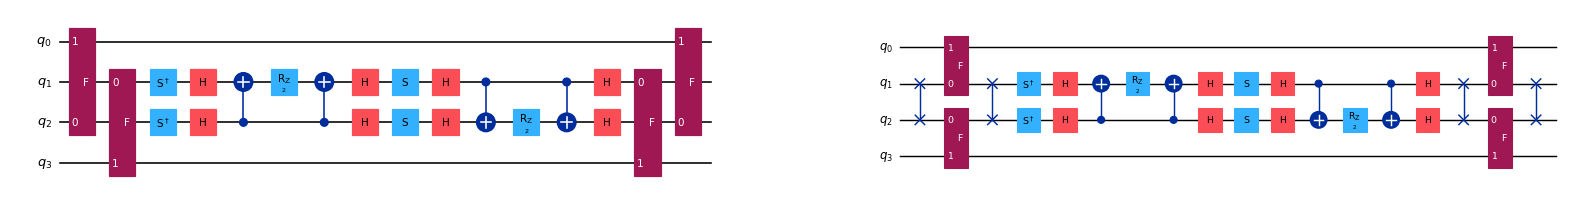

Are those equivalent :  True


In [ ]:
k=1
n=1
qc_a = QuantumCircuit(4, name="Single plaquette")

# The F gates before the simpplification that is done in the paper
qc_a.append(custom_gate.F(k=k,n=n),[2,0])
qc_a.append(custom_gate.F(k=k,n=n),[1,3])


# If we do the "Using a Clifford we can rotate X ⊗ X and Y ⊗ Y to Z ⊗ I and I ⊗ Z"
# Y ⊗ Y part
# Transformation Y to Z
qc_a.sdg([1,2])
qc_a.h([1,2])
qc_a.cx(2,1)
# Rotation
qc_a.rz(2*t*tau, 1)  # Z rotation for a2
# Transformation Z to Y
qc_a.cx(2,1)
qc_a.h([1,2])
qc_a.s([1,2])
# X ⊗ X part
# Transformation X to Z
qc_a.h([1,2])
qc_a.cx(1,2)
# Rotation
qc_a.rz(2*t*tau, 2) 
# Transformation Z to Y
qc_a.cx(1,2)
qc_a.h([1,2])
# Reversing the F gates
qc_a.append(custom_gate.F(k=k,n=n),[1,3])
qc_a.append(custom_gate.F(k=k,n=n),[2,0])

op = qi.Operator(qc_a)
circuit_mat_a=op.data



qc_b = QuantumCircuit(4, name="Single plaquette")

# The F gates before the simpplification that is done in the paper
qc_b.swap(1,2)
qc_b.append(custom_gate.F(k=k,n=n),[1,0])
qc_b.append(custom_gate.F(k=k,n=n),[2,3])
qc_b.swap(1,2)

# If we do the "Using a Clifford we can rotate X ⊗ X and Y ⊗ Y to Z ⊗ I and I ⊗ Z"
# Y ⊗ Y part
# Transformation Y to Z
qc_b.sdg([1,2])
qc_b.h([1,2])
qc_b.cx(2,1)
# Rotation
qc_b.rz(2*t*tau, 1)  # Z rotation for a2
# Transformation Z to Y
qc_b.cx(2,1)
qc_b.h([1,2])
qc_b.s([1,2])
# X ⊗ X part
# Transformation X to Z
qc_b.h([1,2])
qc_b.cx(1,2)
# Rotation
qc_b.rz(2*t*tau, 2) 
# Transformation Z to Y
qc_b.cx(1,2)
qc_b.h([1,2])
# Reversing the F gates
qc_b.swap(1,2)
qc_b.append(custom_gate.F(k=k,n=n),[2,3])
qc_b.append(custom_gate.F(k=k,n=n),[1,0])
qc_b.swap(1,2)

op = qi.Operator(qc_b)
circuit_mat_b=op.data

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

qc_a.draw(output='mpl', ax=axes[0])
qc_b.draw(output='mpl', ax=axes[1])

plt.show()

print("Are those equivalent : ", np.allclose(circuit_mat_a,circuit_mat_b))


# Figure 4.4

Does the circuit represente the correct time evolution ?  True
Figure saved to figures\single_plaquette_gate.png
LaTeX code saved to circuits\hopping_plaquette_gate.tex


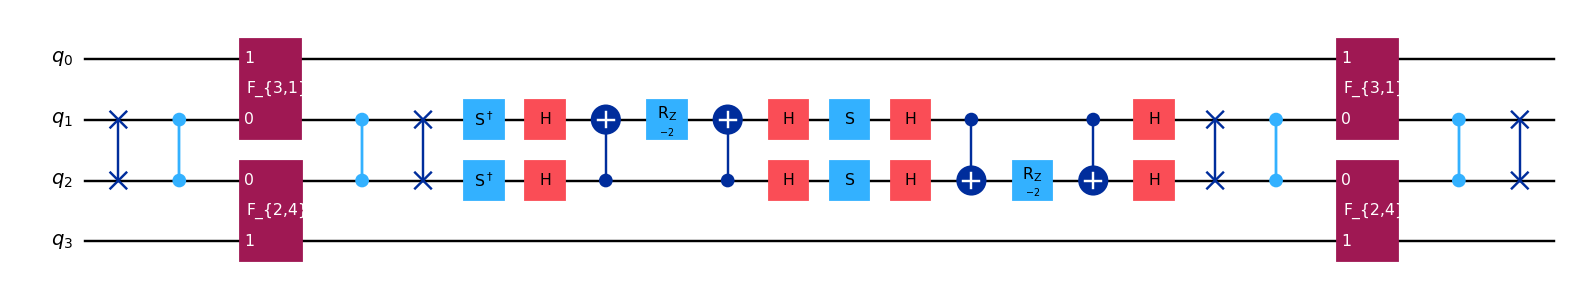

In [ ]:
tau=1
t=1
# Definition of the Operator K

a=FermionOperator('0^ 1', tau)
a+=FermionOperator('0^ 3', tau)
a+=FermionOperator('1^ 0', tau)
a+=FermionOperator('1^ 2', tau)
a+=FermionOperator('2^ 1', tau)
a+=FermionOperator('2^ 3', tau)
a+=FermionOperator('3^ 0', tau)
a+=FermionOperator('3^ 2', tau)

operator_mat_a = get_sparse_operator(a).toarray()
# Computing e^itK

exp_mat_a = expm(1j * t * operator_mat_a)

# Definition of the circuit
qc = QuantumCircuit(4)

qc.append(custom_gate.hopping_plaquette(tau=tau, t=t), list(range(4)))
decomposed_circuit = qc.decompose()

fig, axes = plt.subplots(figsize=(20, 10))
decomposed_circuit.draw(output='mpl', ax=axes)

# Getting the operator
op = qi.Operator(qc)
circuit_mat_a=op.data
print("Does the circuit represente the correct time evolution ? ", np.allclose(circuit_mat_a,exp_mat_a))

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "single_plaquette_gate.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = decomposed_circuit.draw(output='latex_source')
file_path_latex = os.path.join("circuits", "hopping_plaquette_gate.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")



# Figure 4.5

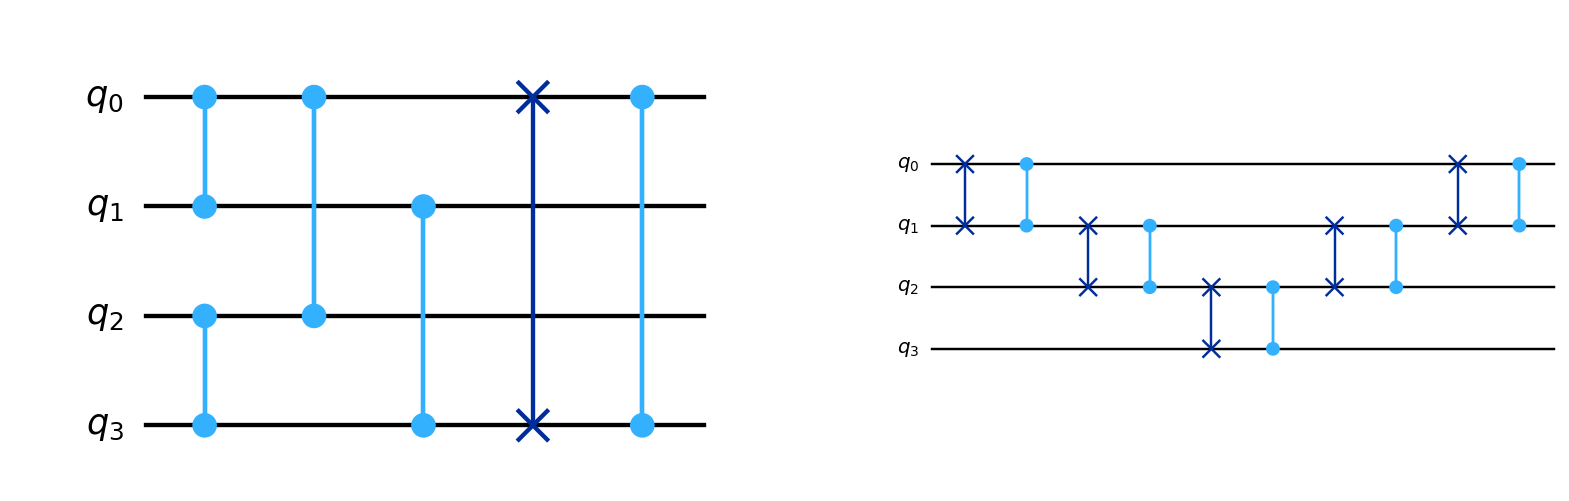

Are those equivalent :  True


In [ ]:
k=1
n=1
qc_a = QuantumCircuit(4)

qc_a.append(custom_gate.f_swap_chain(0,3),[0,1,2,3])


op = qi.Operator(qc_a)
circuit_mat_a=op.data



qc_b = QuantumCircuit(4)

qc_b.swap(0,1)
qc_b.cz(0,1)
qc_b.swap(1,2)
qc_b.cz(1,2)
qc_b.swap(2,3)
qc_b.cz(2,3)
qc_b.swap(1,2)
qc_b.cz(1,2)
qc_b.swap(0,1)
qc_b.cz(0,1)


op = qi.Operator(qc_b)
circuit_mat_b=op.data

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

qc_a.decompose().draw(output='mpl', ax=axes[0])
qc_b.draw(output='mpl', ax=axes[1])

plt.show()

print("Are those equivalent : ", np.allclose(circuit_mat_a,circuit_mat_b))


# Figure 4.6

Does the circuit represente the correct time evolution ?  True
Figure saved to figures\single_plaquette_gate.png
LaTeX code saved to circuits\hopping_plaquette_gate.tex


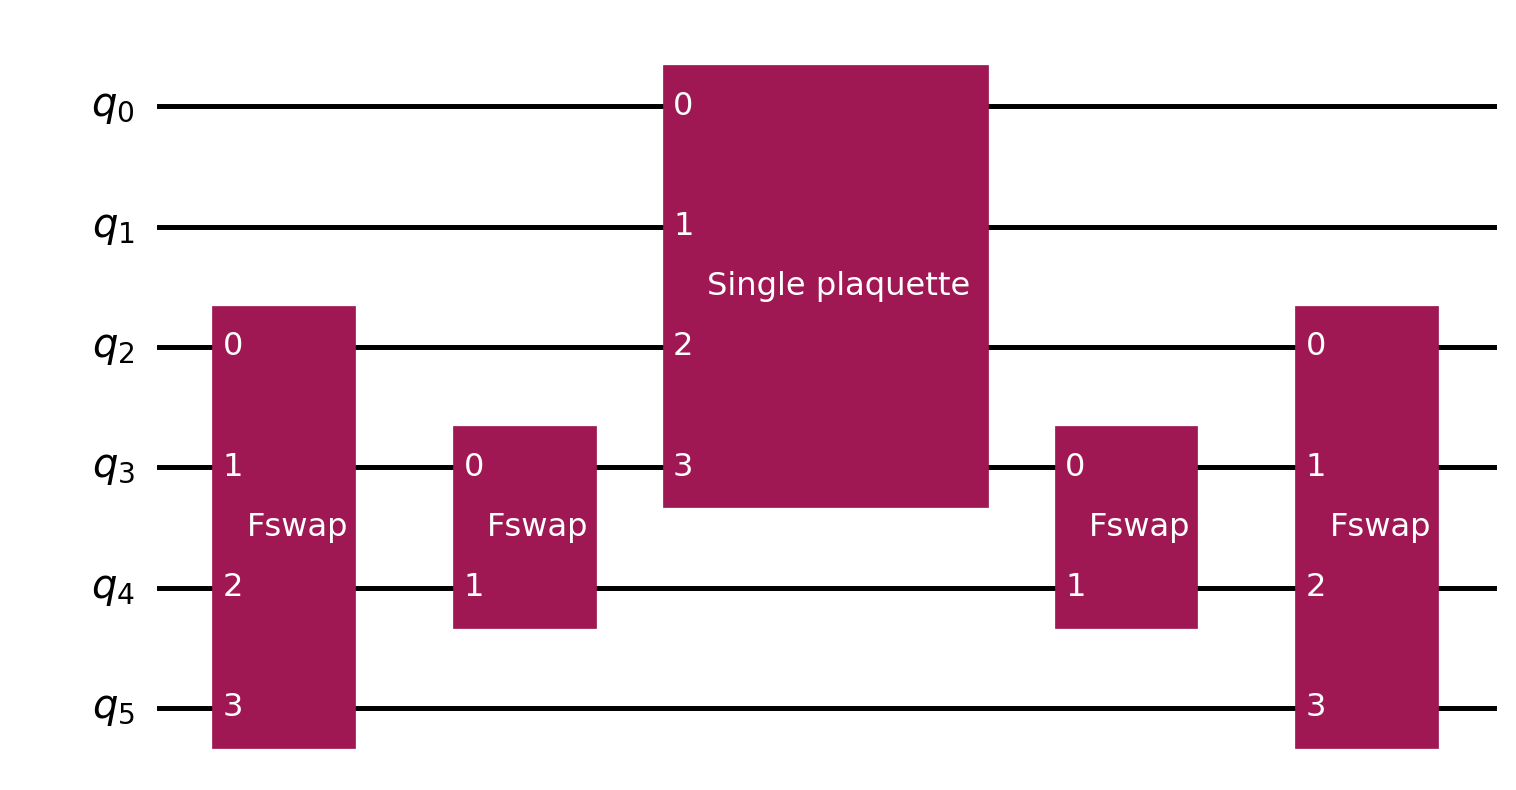

In [ ]:
tau=1
t=1
# Definition of the Operator K

a=FermionOperator('0^ 1', tau)
a+=FermionOperator('0^ 4', tau)
a+=FermionOperator('1^ 0', tau)
a+=FermionOperator('1^ 5', tau)
a+=FermionOperator('5^ 1', tau)
a+=FermionOperator('5^ 4', tau)
a+=FermionOperator('4^ 0', tau)
a+=FermionOperator('4^ 5', tau)

operator_mat_a = get_sparse_operator(a).toarray()
# Computing e^itK

exp_mat_a = expm(1j * t * operator_mat_a)

# Definition of the circuit
qc = QuantumCircuit(6)

qc.append(custom_gate.f_swap_chain(2,5), list(range(2,6)))
qc.append(custom_gate.f_swap_chain(3,4), list(range(3,5)))
qc.append(custom_gate.hopping_plaquette(tau=tau, t=t), list(range(4)))
qc.append(custom_gate.f_swap_chain(3,4), list(range(3,5)))
qc.append(custom_gate.f_swap_chain(2,5), list(range(2,6)))

fig, axes = plt.subplots(figsize=(20, 10))
qc.draw(output='mpl', ax=axes)

# Getting the operator
op = qi.Operator(qc)
circuit_mat_a=op.data
print("Does the circuit represente the correct time evolution ? ", np.allclose(circuit_mat_a,exp_mat_a))

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "arbitrary_plaquette.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = qc.draw(output='latex_source')
file_path_latex = os.path.join("circuits", "arbitrary_plaquette.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")



# Figure 4.7

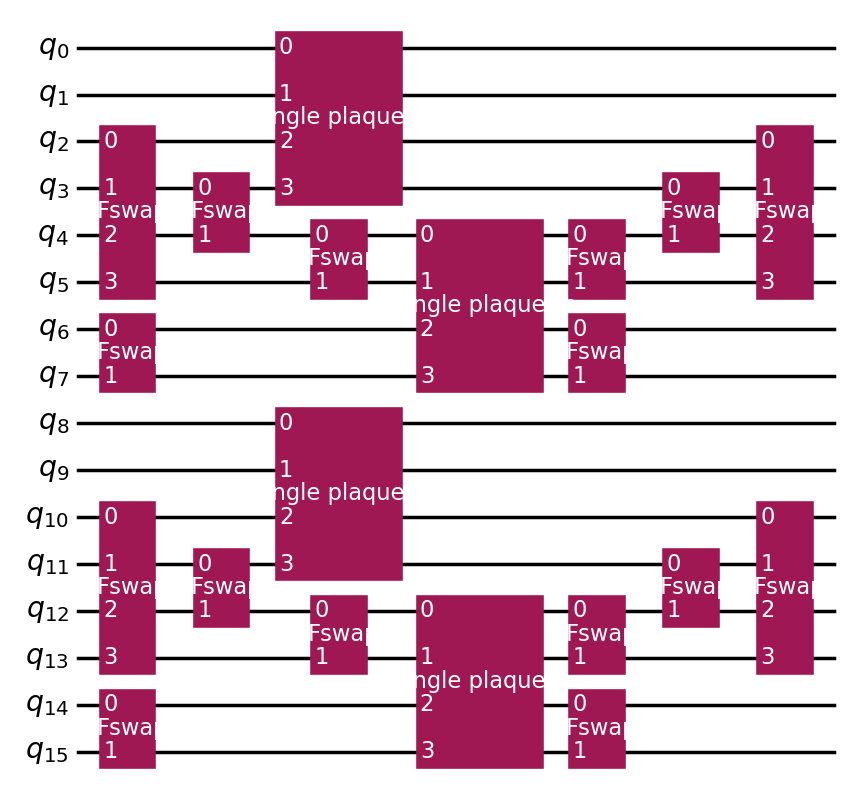

Figure saved to figures\all_pinks_and_gold.png
LaTeX code saved to circuits\all_pinks.tex


In [ ]:
L=4
t=1
tau=1
qc_p = QuantumCircuit(L**2)
qc_p.append(custom_gate.hopping_plaquettes(L,tau,t,'pink',k=0,n=0,controlled=False,debug=False), list(range(16)))
 
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

qc_p.decompose().draw(output='mpl', ax=axes)


plt.show()

os.makedirs("figures", exist_ok=True)
file_path = os.path.join("figures", "all_pinks.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = qc_p.decompose().draw(output='latex_source')
file_path_latex = os.path.join("circuits", "all_pinks.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")


# Figure 4.8

Does the left circuit represente the correct time evolution of the UNSHIFTED interaction term ?   True
Does the right circuit represente the correct time evolution of the SHIFTED interaction term ?  True


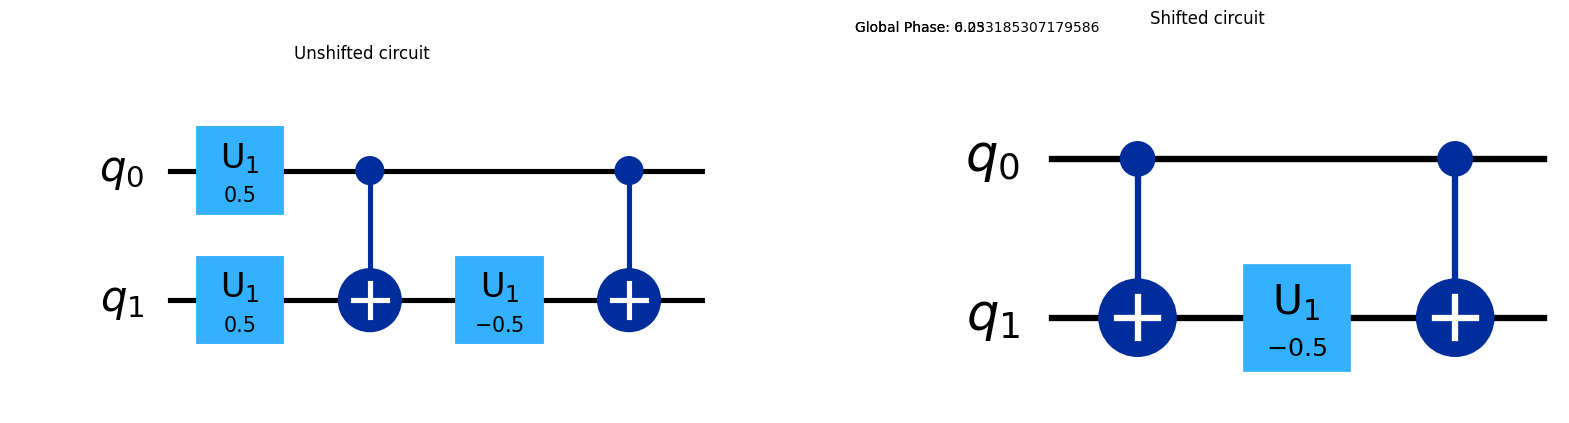

In [ ]:
L=2
u=1
t=1

# Interaction part with the shifted potential
a=FermionOperator('0^ 0 1^ 1', u)

operator_mat_a = get_sparse_operator(a).toarray()
# Computing e^(itH_u)

exp_mat_a = expm(1j * t * operator_mat_a)


# Interaction part with the shifted potential

b=(FermionOperator('0^ 0')+FermionOperator('',-1/2))*(FermionOperator('1^ 1')+FermionOperator('',-1/2))
b*=u

operator_mat_b = get_sparse_operator(b).toarray()
# Computing e^(itH_i)

exp_mat_b = expm(1j * t * operator_mat_b)


qc_a = QuantumCircuit(2)


qc_a.rz(u*t/2, 0)
qc_a.rz(u*t/2, 1)

qc_a.cx(0, 1)
qc_a.rz(-u*t/2, 1)
qc_a.cx(0, 1)

op = qi.Operator(qc_a)
circuit_mat_a=op.data


qc_b = QuantumCircuit(2)

qc_b.cx(0, 1)
qc_b.rz(-u*t/2, 1)  # Apply Rz to the second qubit (down)
qc_b.cx(0, 1)

op = qi.Operator(qc_b)
circuit_mat_b=op.data


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

qc_a.decompose().draw(output='mpl', ax=axes[0])
qc_b.decompose().draw(output='mpl', ax=axes[1])
axes[0].set_title("Unshifted circuit")
axes[1].set_title("Shifted circuit")


print("Does the left circuit represente the correct time evolution of the UNSHIFTED interaction term ?  ", np.allclose(np.exp(1j*t*u/4)*circuit_mat_a,exp_mat_a))
print("Does the right circuit represente the correct time evolution of the SHIFTED interaction term ? ", np.allclose(circuit_mat_b,exp_mat_b))

# Figure 4.9

Does the circuit represente the correct time evolution ?  True


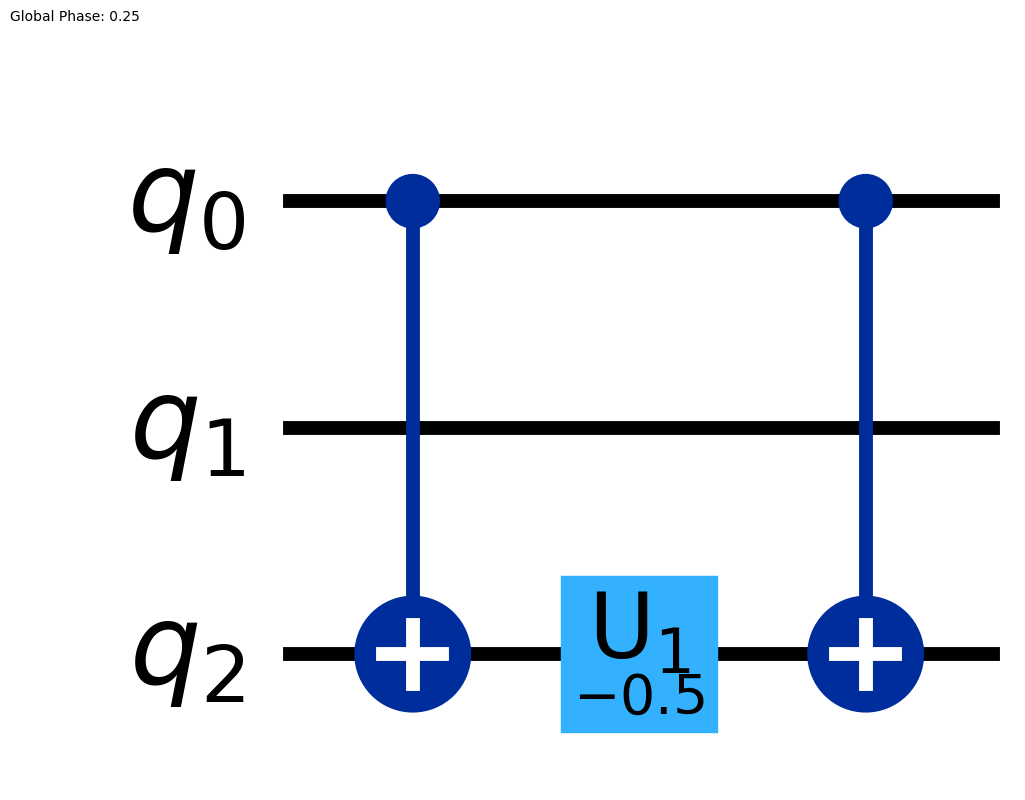

In [ ]:
L=2
u=1
t=1


# Interaction between 0 and 2

b=(FermionOperator('0^ 0')+FermionOperator('',-1/2))*(FermionOperator('2^ 2')+FermionOperator('',-1/2))
b*=u

operator_mat_b = get_sparse_operator(b).toarray()
# Computing e^(itH_i)

exp_mat_b = expm(1j * t * operator_mat_b)


qc_b = QuantumCircuit(3)

qc_b.cx(0, 2)
qc_b.rz(-u*t/2, 2)  # Apply Rz to the second qubit (down)
qc_b.cx(0, 2)

op = qi.Operator(qc_b)
circuit_mat_b=op.data


fig, axes = plt.subplots(1, 1, figsize=(20, 10))

qc_b.decompose().draw(output='mpl', ax=axes)

print("Does the circuit represente the correct time evolution ? ", np.allclose(circuit_mat_b,exp_mat_b))


os.makedirs("figures", exist_ok=True)
file_path = os.path.join("figures", "arbitrary_interaction.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = qc_b.decompose().draw(output='latex_source')
file_path_latex = os.path.join("circuits", "arbitrary_interaction.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")

# Figure 4.10

Does the circuit represente the correct time evolution ?  True


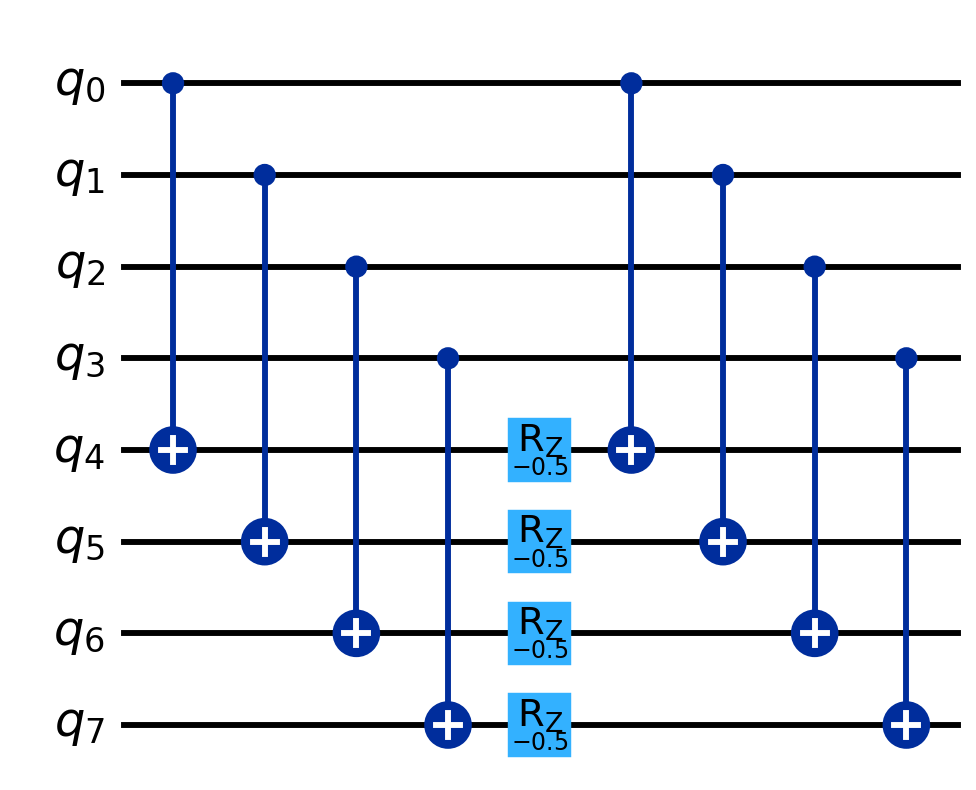

In [ ]:
L=2
u=1
t=1

a=0
# Interactions over a L=2 lattice
for i in range(4) :
    a+=(FermionOperator(f'{i}^ {i}')+FermionOperator('',-1/2))*(FermionOperator(f'{i+4}^ {i+4}')+FermionOperator('',-1/2))
a*=u

operator_mat_a = get_sparse_operator(a).toarray()
# Computing e^(itH_i)

exp_mat_a = expm(1j * t * operator_mat_a)


op = qi.Operator(qc_a)
circuit_mat_a=op.data


qc_a = QuantumCircuit(2*L**2)

qc_a.append(custom_gate.interaction(L, u, t, controlled=False), list(range(2*L**2)))


fig, axes = plt.subplots(1, 1, figsize=(20, 10))

qc_a.decompose().draw(output='mpl', ax=axes)

print("Does the circuit represente the correct time evolution ? ", np.allclose(circuit_mat_a,exp_mat_a))

os.makedirs("figures", exist_ok=True)
file_path = os.path.join("figures", "Interactions.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = qc_a.decompose().draw(output='latex_source')
file_path_latex = os.path.join("circuits", "Interactions.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")

# Figure 4.11

Figure saved to figures\Hubbard_unitary.png
LaTeX code saved to circuits\Hubbard_unitary.tex


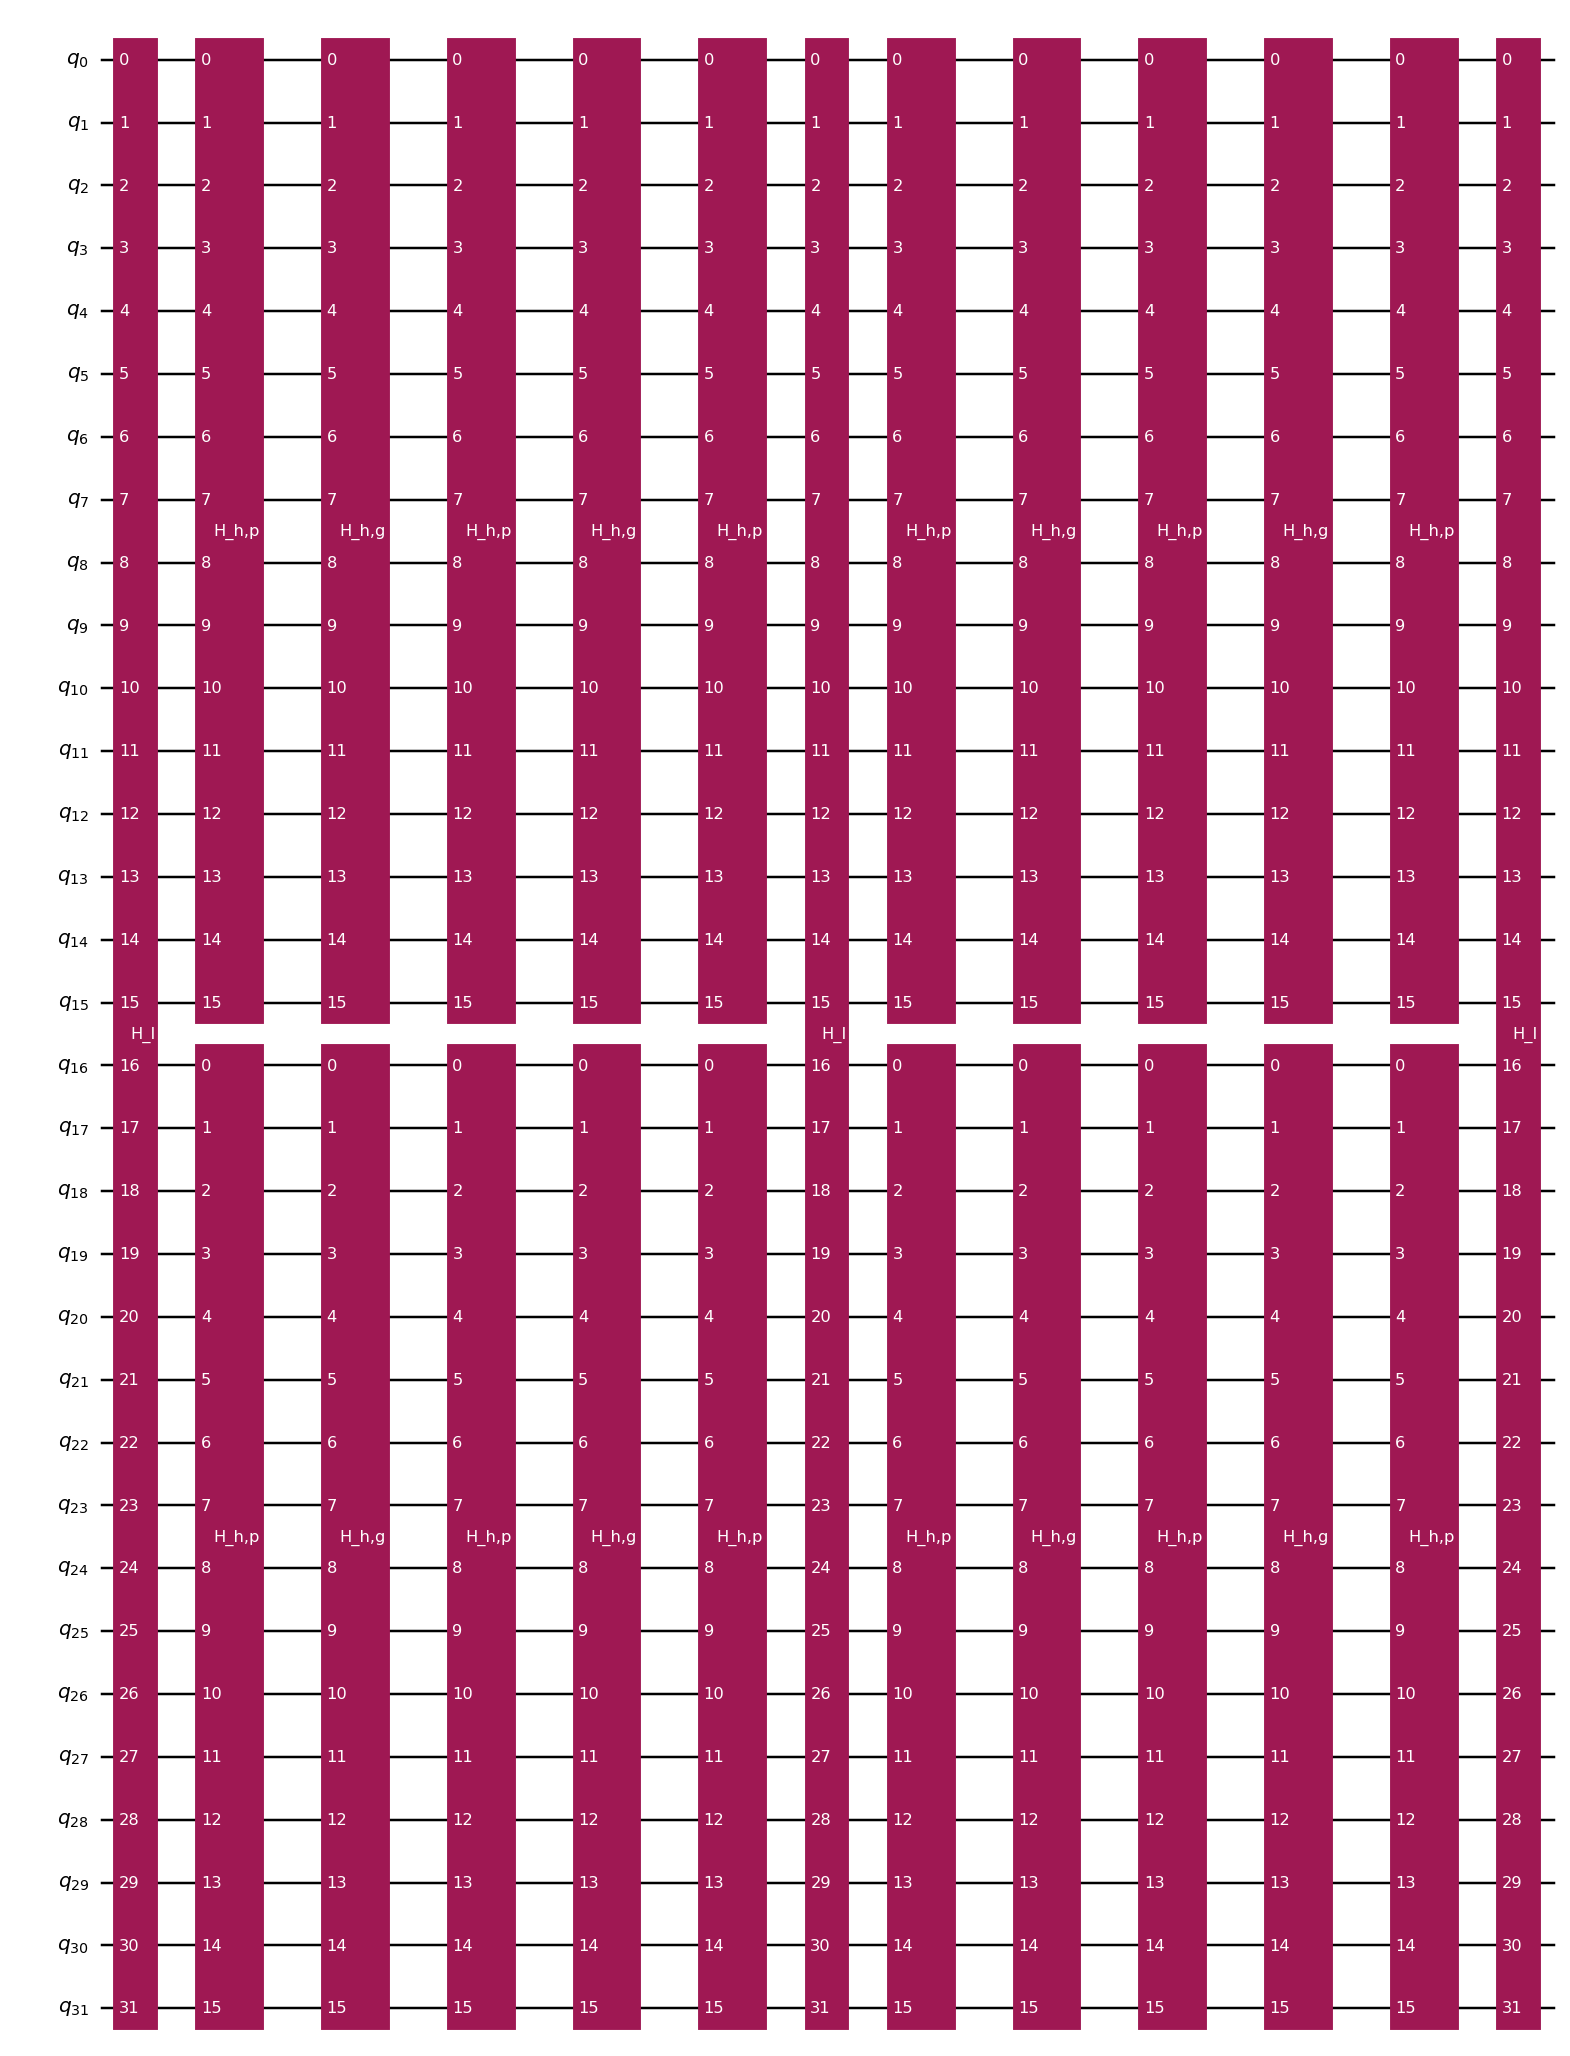

In [4]:
L=4
u=1
tau=8
t=1


qc_a = QuantumCircuit(2*L**2)

qc_a.append(custom_gate.hubbard_unitary(L,tau,u,t,step_plaq=2,trotter_step=1,r=2,k=0,n=0,controlled=False), list(range(2*L**2)))


fig, axes = plt.subplots(1, 1, figsize=(20, 50))

qc_a.decompose().decompose(gates_to_decompose='H_h').draw(output='mpl', ax=axes)

os.makedirs("figures", exist_ok=True)
file_path = os.path.join("figures", "Hubbard_unitary.png")
fig.savefig(file_path)

print(f"Figure saved to {file_path}")

os.makedirs("circuits", exist_ok=True)
latex_code = qc_a.decompose().decompose(gates_to_decompose='H_h').draw(output='latex_source')
file_path_latex = os.path.join("circuits", "Hubbard_unitary.tex")
with open(file_path_latex, 'w') as file:
    file.write(latex_code)
print(f"LaTeX code saved to {file_path_latex}")


# Figure 5.3

10 steps:
Hilbert-Schmidt difference : 0.017724492972152006
Fidelity : 1.2271783895734245e-06
20 steps:
Hilbert-Schmidt difference : 0.004424462819608638
Fidelity : 7.64683758536222e-08
30 steps:
Hilbert-Schmidt difference : 0.0019658822082107867
Fidelity : 1.509664770971142e-08
40 steps:
Hilbert-Schmidt difference : 0.001105701407416915
Fidelity : 4.775940309897919e-09
50 steps:
Hilbert-Schmidt difference : 0.0007076171166255402
Fidelity : 1.956274697789695e-09


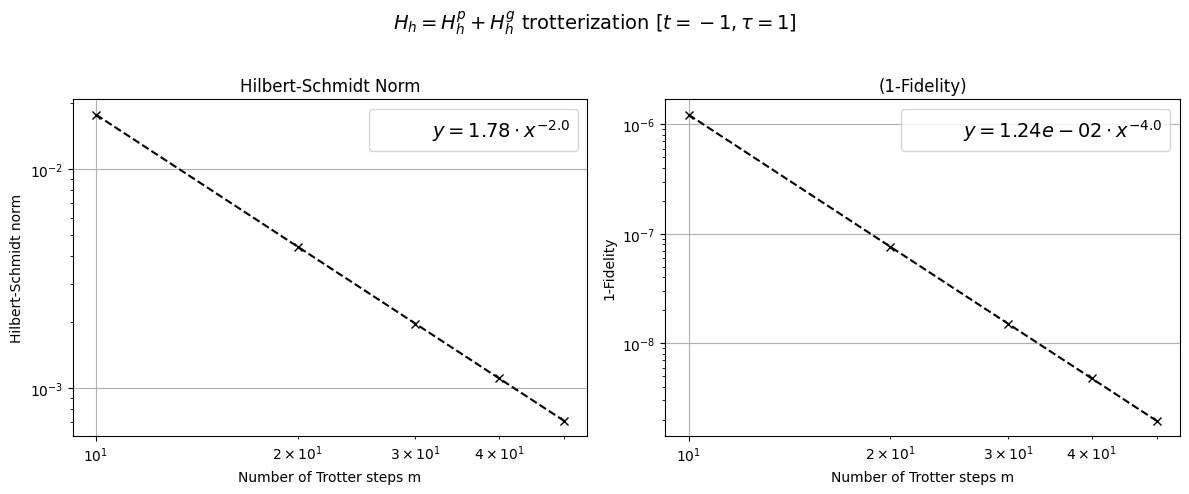

In [7]:
tau=1
t=-1
# Definition of the Operator K

a=FermionOperator('0^ 1', tau)
a+=FermionOperator('0^ 2', tau)
a+=FermionOperator('1^ 0', tau)
a+=FermionOperator('1^ 3', tau)
a+=FermionOperator('2^ 0', tau)
a+=FermionOperator('2^ 3', tau)
a+=FermionOperator('3^ 1', tau)
a+=FermionOperator('3^ 2', tau)
a+=FermionOperator('3^ 4', tau)
a+=FermionOperator('3^ 5', tau)
a+=FermionOperator('4^ 3', tau)
a+=FermionOperator('4^ 6', tau)
a+=FermionOperator('5^ 3', tau)
a+=FermionOperator('5^ 6', tau)
a+=FermionOperator('6^ 4', tau)
a+=FermionOperator('6^ 5', tau)

operator_mat_a = get_sparse_operator(a).toarray()
# Computing e^itK

exp_mat_a = expm(1j * t * operator_mat_a)

fro_norms=[]
fidelities=[]

m_values = []

for m in range(10,51,10) :
    # Definition of the circuit
    qc = QuantumCircuit(7)

    qc.swap(2,3)
    qc.cz(2,3)
    qc.append(custom_gate.hopping_plaquette(tau=tau, t=t/(2*m)), [0,1,2,3])
    qc.cz(2,3)
    qc.swap(2,3)

    qc.swap(5,6)
    qc.cz(5,6)
    qc.append(custom_gate.hopping_plaquette(tau=tau, t=t/m), [3,4,5,6])
    qc.cz(5,6)
    qc.swap(5,6)

    for _ in range(m-1) :

        qc.swap(2,3)
        qc.cz(2,3)
        qc.append(custom_gate.hopping_plaquette(tau=tau, t=t/m), [0,1,2,3])
        qc.cz(2,3)
        qc.swap(2,3)

        qc.swap(5,6)
        qc.cz(5,6)
        qc.append(custom_gate.hopping_plaquette(tau=tau, t=t/m), [3,4,5,6])
        qc.cz(5,6)
        qc.swap(5,6)
        
    qc.swap(2,3)
    qc.cz(2,3)
    qc.append(custom_gate.hopping_plaquette(tau=tau, t=t/(2*m)), [0,1,2,3])
    qc.cz(2,3)
    qc.swap(2,3)


    # Getting the operator
    op = qi.Operator(qc)
    circuit_mat_a=op.data

    fro= np.linalg.norm((circuit_mat_a-exp_mat_a), 'fro')
    fid=1-(1/np.shape(circuit_mat_a)[0])*np.abs(np.trace(np.matmul(np.transpose(np.conjugate(circuit_mat_a)),exp_mat_a)))
    print(f'{m} steps:')
    print("Hilbert-Schmidt difference :", fro)
    print("Fidelity :", fid)

    m_values.append(m)
    fro_norms.append(fro)
    fidelities.append(fid)

# Fitting a curve
def power_law(x, C, k):
    return C * x**k

popt_fro, _ = curve_fit(power_law, m_values, fro_norms)
C_fro, k_fro = popt_fro

popt_fid, _ = curve_fit(power_law, m_values, fidelities)
C_fid, k_fid = popt_fid

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(m_values, fro_norms, '--', marker='x', color='black')
ax1.set_xlabel("Number of Trotter steps m")
ax1.set_ylabel("Hilbert-Schmidt norm")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.tick_params(axis='y')
ax1.grid()
ax1.set_title("Hilbert-Schmidt Norm")


legend_label = fr"$y = {C_fro:.2f} \cdot x^{{{k_fro:.1f}}}$"
custom_legend = [Line2D([0], [0], color="none", label=legend_label)]

ax1.legend(handles=custom_legend, fontsize=14, loc="best")

ax2.plot(m_values[:], fidelities[:], '--', marker='x', color='black')
ax2.set_xlabel("Number of Trotter steps m")
ax2.set_ylabel("1-Fidelity")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.tick_params(axis='y')
ax2.grid()
ax2.set_title("(1-Fidelity)")

legend_label = fr"$y = {C_fid:.2e} \cdot x^{{{k_fid:.1f}}}$"
custom_legend = [Line2D([0], [0], color="none", label=legend_label)]

ax2.legend(handles=custom_legend, fontsize=14, loc="best")

fig.suptitle(fr'$H_h = H_h^p + H_h^g$ trotterization $[t={t},\tau={tau}]$', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "trotter_m.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')


# Figure 5.4

10 steps:
Hilbert-Schmidt difference : 0.33270581632811885
Fidelity : 0.0002161975786144632
20 steps:
Hilbert-Schmidt difference : 0.08201062397328339
Fidelity : 1.313621583509672e-05
30 steps:
Hilbert-Schmidt difference : 0.03635402371512925
Fidelity : 2.581279562097194e-06
40 steps:
Hilbert-Schmidt difference : 0.02043044174824062
Fidelity : 8.152403847550005e-07
50 steps:
Hilbert-Schmidt difference : 0.01306994816199151
Fidelity : 3.3364007068215074e-07


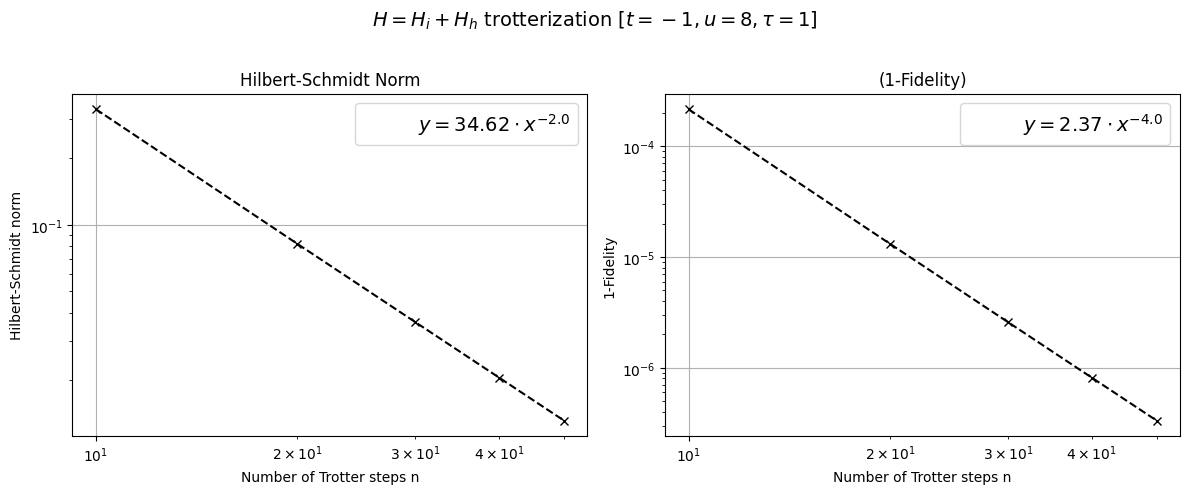

In [8]:
L=2
u=8
tau=1
t=-1

a=0

# Interaction part with the shifted potential
for i in range(L**2) :
    a+=(FermionOperator(f'{i}^ {i}')+FermionOperator('',-1/2))*(FermionOperator(f'{i+L**2}^ {i+L**2}')+FermionOperator('',-1/2))
a*=u

# Hopping part 
a+=FermionOperator('0^ 1', tau)
a+=FermionOperator('0^ 2', tau)
a+=FermionOperator('1^ 0', tau)
a+=FermionOperator('1^ 3', tau)
a+=FermionOperator('2^ 0', tau)
a+=FermionOperator('2^ 3', tau)
a+=FermionOperator('3^ 1', tau)
a+=FermionOperator('3^ 2', tau)
a+=FermionOperator('4^ 5', tau)
a+=FermionOperator('4^ 6', tau)
a+=FermionOperator('5^ 4', tau)
a+=FermionOperator('5^ 7', tau)
a+=FermionOperator('6^ 4', tau)
a+=FermionOperator('6^ 7', tau)
a+=FermionOperator('7^ 5', tau)
a+=FermionOperator('7^ 6', tau)

operator_mat_a = get_sparse_operator(a).toarray()
# Computing e^itK

exp_mat_a = expm(1j * t * operator_mat_a)

fro_norms=[]
fidelities=[]

n_values = []

for n in range(10,51,10) :
    # Definition of the circuit
    qc = QuantumCircuit(8)

    qc.append(custom_gate.hubbard_unitary(L,tau,u,t,step_plaq=1,trotter_step=n,r=1,k=0,n=0,controlled=False), list(range(8)))

    # Getting the operator
    op = qi.Operator(qc)
    circuit_mat_a=op.data

    fro= np.linalg.norm((circuit_mat_a-exp_mat_a), 'fro')
    fid=1-(1/np.shape(circuit_mat_a)[0])*np.abs(np.trace(np.matmul(np.transpose(np.conjugate(circuit_mat_a)),exp_mat_a)))
    print(f'{n} steps:')
    print("Hilbert-Schmidt difference :", fro)
    print("Fidelity :", fid)

    n_values.append(n)
    fro_norms.append(fro)
    fidelities.append(fid)


# Fitting a curve
def power_law(x, C, k):
    return C * x**k

popt_fro, _ = curve_fit(power_law, n_values, fro_norms)
C_fro, k_fro = popt_fro

popt_fid, _ = curve_fit(power_law, n_values, fidelities)
C_fid, k_fid = popt_fid

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(n_values, fro_norms, '--', marker='x', color='black')
ax1.set_xlabel("Number of Trotter steps n")
ax1.set_ylabel("Hilbert-Schmidt norm")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.grid()
ax1.set_title("Hilbert-Schmidt Norm")


legend_label = fr"$y = {C_fro:.2f} \cdot x^{{{k_fro:.1f}}}$"
custom_legend = [Line2D([0], [0], color="none", label=legend_label)]

ax1.legend(handles=custom_legend, fontsize=14, loc="best")

ax2.plot(n_values[:], fidelities[:], '--', marker='x', color='black')
ax2.set_xlabel("Number of Trotter steps n")
ax2.set_ylabel("1-Fidelity")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.grid()
ax2.set_title("(1-Fidelity)")

legend_label = fr"$y = {C_fid:.2f} \cdot x^{{{k_fid:.1f}}}$"
custom_legend = [Line2D([0], [0], color="none", label=legend_label)]

ax2.legend(handles=custom_legend, fontsize=14, loc="best")

fig.suptitle(fr'$H = H_i + H_h$ trotterization $[t={t}, u={u},\tau={tau}]$', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "trotter_n.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')


# Figure 5.5

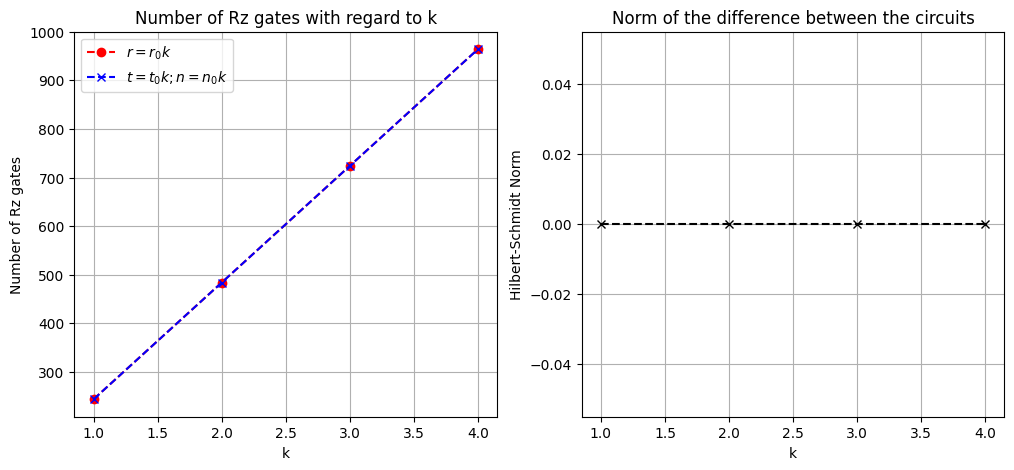

In [ ]:
L=2
t=1
u=8
tau=1

r_0=1
n_0=30
delta=[]
rz_r=[]
rz_n=[]
ks=list(range(1,5))
for k in ks :
    qc_r = QuantumCircuit(2*L**2)

    qc_r.append(custom_gate.hubbard_unitary(L,tau,u,t,step_plaq=1,trotter_step=n_0,r=r_0*k,k=0,n=0,controlled=False),list(range(2*L**2)))
    decomposed_r=qc_r.decompose().decompose(gates_to_decompose=['H_h','H_I']).decompose(gates_to_decompose=['H_h,g','H_h,p']).decompose(gates_to_decompose=['Single plaquette']).decompose(gates_to_decompose=['F_{2,4}','F_{3,1}'])
    gate_counts_r=dict(decomposed_r.count_ops())
    rz_r.append(gate_counts_r.get('rz'))
    op_r = qi.Operator(qc_r)
    circuit_mat_r=op_r.data

    qc_n = QuantumCircuit(2*L**2)

    qc_n.append(custom_gate.hubbard_unitary(L,tau,u,t*k,step_plaq=1,trotter_step=n_0*k,r=1,k=0,n=0,controlled=False),list(range(2*L**2)))
    decomposed_n=qc_n.decompose().decompose(gates_to_decompose=['H_h','H_I']).decompose(gates_to_decompose=['H_h,g','H_h,p']).decompose(gates_to_decompose=['Single plaquette']).decompose(gates_to_decompose=['F_{2,4}','F_{3,1}'])
    gate_counts_n=dict(decomposed_r.count_ops())
    rz_n.append(gate_counts_n.get('rz'))

    op_n = qi.Operator(qc_n)
    circuit_mat_n=op_n.data

    difference = np.linalg.norm((circuit_mat_r-circuit_mat_n), 'fro')
    delta.append(difference)

# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(ks, rz_r, '--', marker='o', color='red',label=r'$r=r_0 k$')
axes[0].plot(ks, rz_n, '--', marker='x', color='blue',label=r'$t=t_0 k ; n=n_0 k$')
axes[0].legend()
axes[0].set_xlabel('k')
axes[0].set_ylabel('Number of Rz gates')
axes[0].grid()
axes[0].set_title("Number of Rz gates with regard to k")

axes[1].plot(ks, delta, '--', marker='x', color='black')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Hilbert-Schmidt Norm')
axes[1].grid()
axes[1].set_title("Norm of the difference between the circuits")

plt.show()

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "t_n_or_r.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')


# Figure 5.6

In [ ]:
L=2
u=8
tau=1
a=0

# Interaction part with the shifted potential
for i in range(L**2) :
    a+=(FermionOperator(f'{i}^ {i}')+FermionOperator('',-1/2))*(FermionOperator(f'{i+L**2}^ {i+L**2}')+FermionOperator('',-1/2))
a*=u

# Hopping part 
a+=FermionOperator('0^ 1', tau)
a+=FermionOperator('0^ 2', tau)
a+=FermionOperator('1^ 0', tau)
a+=FermionOperator('1^ 3', tau)
a+=FermionOperator('2^ 0', tau)
a+=FermionOperator('2^ 3', tau)
a+=FermionOperator('3^ 1', tau)
a+=FermionOperator('3^ 2', tau)
a+=FermionOperator('4^ 5', tau)
a+=FermionOperator('4^ 6', tau)
a+=FermionOperator('5^ 4', tau)
a+=FermionOperator('5^ 7', tau)
a+=FermionOperator('6^ 4', tau)
a+=FermionOperator('6^ 7', tau)
a+=FermionOperator('7^ 5', tau)
a+=FermionOperator('7^ 6', tau)

operator_mat_a = get_sparse_operator(a).toarray()
eigval_operator_a,eigvec_operator_a=np.linalg.eig(operator_mat_a)
unique_a, counts_a = np.unique(eigval_operator_a.round(5), return_counts=True)
print("Unique eigenvalues of the model :")
print(np.real_if_close(unique_a))

# This is the smart way that would truly map t*lamba to -pi, pi if Emmin=-Emax, but we just need the divisor to be big enought 
t=2*np.pi/np.real(np.max(eigval_operator_a)-np.min(eigval_operator_a)).round(4)

# This way all of the angles will be "squished" into a smaller integer. It just need to be smaller than [-pi,pi]
t=(2*np.pi/20)


print(f'Emin = {np.min(eigval_operator_a).round(4)}, Emax = {np.max(eigval_operator_a).round(4)}, t={t}')

exp_mat_a = expm(-1j * t * operator_mat_a)
exp_mat_a = exp_mat_a.round(5)

eigval_exp_operator_a,eigvec_exp_operator_a=np.linalg.eig(exp_mat_a)



Unique eigenvalues of the model :
[-9.32023 -8.98792 -8.51368 -8.47214 -8.      -6.32456 -6.      -5.2915
 -4.      -3.4641  -3.20775 -2.82843 -2.21983 -2.      -0.80656 -0.47214
  0.       0.47214  0.80656  2.       2.21983  2.82843  3.20775  3.4641
  4.       5.2915   6.       6.32456  8.       8.47214  8.51368  8.98792
  9.32023]
Emin = (-9.3202+0j), Emax = (9.3202+0j), t=0.3141592653589793


3  :
{'101': 95, '111': 1, '110': 1, '100': 2, '011': 1}
{0.625: 95, 0.875: 1, 0.75: 1, 0.5: 2, 0.375: 1}
Mean: 0.62375 Variance: 0.0017171875
4  :
{'0001': 1, '1010': 52, '1001': 27, '0000': 1, '1000': 6, '1011': 5, '1101': 2, '1100': 3, '0110': 2, '0111': 1}
{0.0625: 1, 0.625: 52, 0.5625: 27, 0.0: 1, 0.5: 6, 0.6875: 5, 0.8125: 2, 0.75: 3, 0.375: 2, 0.4375: 1}
Mean: 0.5925 Variance: 0.010974999999999999
5  :
{'01110': 1, '10100': 7, '10011': 82, '01001': 1, '10000': 1, '10010': 2, '10001': 3, '10110': 1, '10101': 1, '11010': 1}
{0.4375: 1, 0.625: 7, 0.59375: 82, 0.28125: 1, 0.5: 1, 0.5625: 2, 0.53125: 3, 0.6875: 1, 0.65625: 1, 0.8125: 1}
Mean: 0.5915625 Variance: 0.0021143554687500002
6  :
{'100110': 58, '110000': 1, '100111': 22, '101100': 1, '100001': 1, '101001': 5, '101000': 2, '100101': 5, '011010': 1, '100100': 1, '100010': 1, '110101': 1, '100000': 1}
{0.59375: 58, 0.75: 1, 0.609375: 22, 0.6875: 1, 0.515625: 1, 0.640625: 5, 0.625: 2, 0.578125: 5, 0.40625: 1, 0.5625: 1, 0.53125:

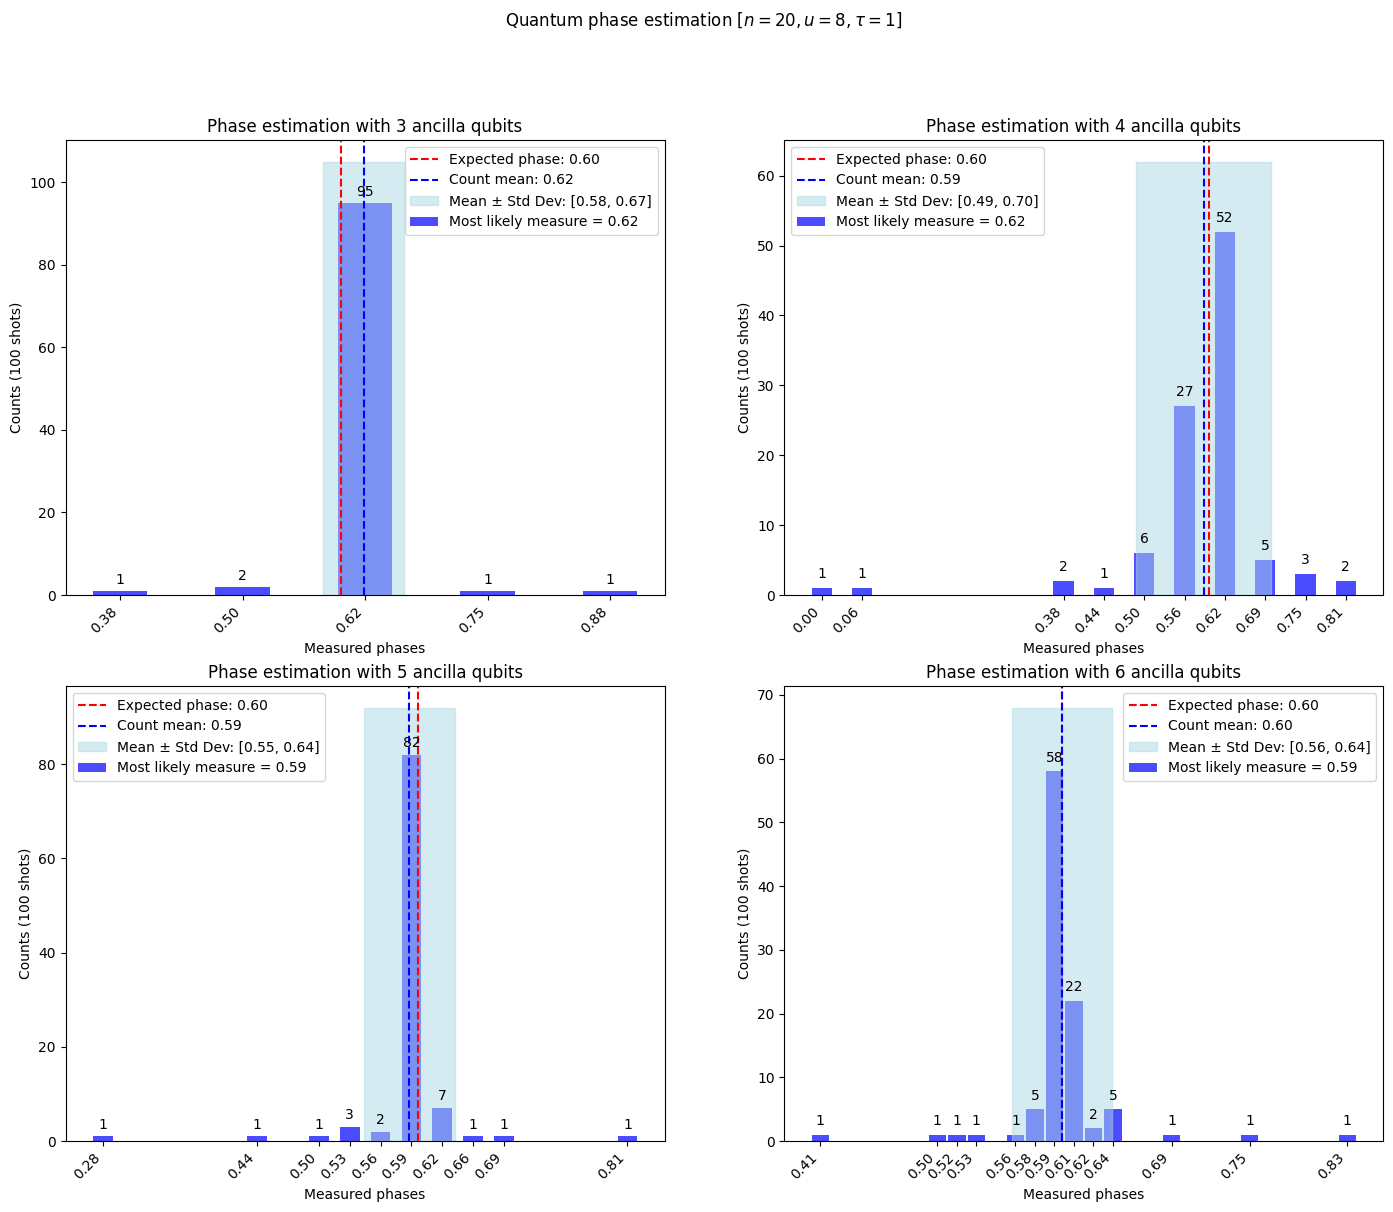

In [ ]:
# From e^it\lambda to e^i\theta
angles=np.angle(eigval_exp_operator_a)

# From [-pi,pi] to [0,2pi]
angles = np.mod(angles + 2 * np.pi, 2 * np.pi)
phases=(angles/(2*np.pi))

# Select an eigenstate of the system
i=5
state=eigvec_exp_operator_a[:,i]
expected=phases[i]
trotter_steps=20
fig, axes = plt.subplots(2, 2,figsize=(17, 13))
fig.suptitle(fr'Quantum phase estimation $[n={trotter_steps}, u={u}, \tau={tau}]$')

for k,precision in enumerate(range(3,7)) :
    print(precision, ' :')

    counts= phase_estimation.single_phase_estimation_run(L,tau,u,-t,precision,state,step_plaq=1,trotter_step=trotter_steps,shots=100,backend=AerSimulator(method="statevector"))
    new_counts = {}
    for measured_state, count in counts.items():
        decimal_key = int(measured_state, 2)/(2**precision)  # Convert binary string to decimal, and then to a number between 0 and 1
        new_counts[decimal_key] = count
    # For clarity
    print(counts)
    print(new_counts)
    total_counts = sum(new_counts.values())
    mean = sum(value * count for value, count in new_counts.items()) / total_counts
    variance = sum(((value - mean)**2) * count for value, count in new_counts.items()) / total_counts
    print("Mean:", mean, "Variance:", variance)

    bar_positions = list(new_counts.keys())
    bar_heights = list(new_counts.values()) 
    bar_width = 1/(2*precision**2)

    bars = axes[k//2,k%2].bar(bar_positions, bar_heights, width=bar_width, color='blue', alpha=0.7,label=f'Most likely measure = {max(new_counts, key=new_counts.get):.2f}')
    for bar, count in zip(bars, bar_heights):
        axes[k//2,k%2].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count), ha='center', va='bottom', fontsize=10)

    axes[k//2,k%2].axvline(x=expected, color='red', linestyle='--', linewidth=1.5, label=f"Expected phase: {expected:.2f}")
    axes[k//2,k%2].axvline(x=mean, color='blue', linestyle='--', linewidth=1.5, label=f"Count mean: {mean:.2f}")

    lower = max(mean - variance**0.5,0)
    upper = min(mean + variance**0.5,1)
    axes[k//2,k%2].fill_between([lower,upper],0,max(bar_heights) + 10,color='lightblue',alpha=0.5,label=f"Mean ± Std Dev: [{lower:.2f}, {upper:.2f}]")

    axes[k//2,k%2].set_xticks(bar_positions)
    axes[k//2,k%2].set_xticklabels([f"{pos:.2f}" for pos in bar_positions],rotation=45, ha='right') 


    axes[k//2,k%2].set_xlabel('Measured phases')
    axes[k//2,k%2].set_ylabel('Counts (100 shots)')
    axes[k//2,k%2].legend(loc='best')
    axes[k//2,k%2].set_title(f'Phase estimation with {precision} ancilla qubits')

plt.show()


os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "phase_estimation.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')

# Figure 5.7 and 5.8

In [ ]:
L=2
u=8
tau=1
a=0

# Interaction part with the shifted potential
for i in range(L**2) :
    a+=(FermionOperator(f'{i}^ {i}')+FermionOperator('',-1/2))*(FermionOperator(f'{i+L**2}^ {i+L**2}')+FermionOperator('',-1/2))
a*=u

# Hopping part 
a+=FermionOperator('0^ 1', tau)
a+=FermionOperator('0^ 2', tau)
a+=FermionOperator('1^ 0', tau)
a+=FermionOperator('1^ 3', tau)
a+=FermionOperator('2^ 0', tau)
a+=FermionOperator('2^ 3', tau)
a+=FermionOperator('3^ 1', tau)
a+=FermionOperator('3^ 2', tau)
a+=FermionOperator('4^ 5', tau)
a+=FermionOperator('4^ 6', tau)
a+=FermionOperator('5^ 4', tau)
a+=FermionOperator('5^ 7', tau)
a+=FermionOperator('6^ 4', tau)
a+=FermionOperator('6^ 7', tau)
a+=FermionOperator('7^ 5', tau)
a+=FermionOperator('7^ 6', tau)

operator_mat_a = get_sparse_operator(a).toarray()
eigval_operator_a,eigvec_operator_a=np.linalg.eig(operator_mat_a)
# Round since most value are very slighty different
unique_a, counts_a = np.unique(eigval_operator_a.round(10), return_counts=True)
unique_a=np.real_if_close(unique_a)
counts_a=np.real_if_close(counts_a)
print("Unique eigenvalues of the model :")
print(unique_a)




# This way all of the angles will be "squished" into a smaller integer. It just need to be smaller than [-pi,pi]
t=(2*np.pi/20)


print(f'Emin = {np.min(eigval_operator_a).round(4)}, Emax = {np.max(eigval_operator_a).round(4)}, t={t}')

exp_mat_a = expm(-1j * t * operator_mat_a)
exp_mat_a = exp_mat_a.round(5)

eigval_exp_operator_a,eigvec_exp_operator_a=np.linalg.eig(exp_mat_a)



Unique eigenvalues of the model :
[-9.32023496 -8.98791841 -8.51367626 -8.47213596 -8.         -6.32455532
 -6.         -5.29150262 -4.         -3.46410162 -3.20775094 -2.82842712
 -2.21983253 -2.         -0.8065587  -0.47213595  0.          0.47213595
  0.8065587   2.          2.21983253  2.82842712  3.20775094  3.46410162
  4.          5.29150262  6.          6.32455532  8.          8.47213596
  8.51367626  8.98791841  9.32023496]
Emin = (-9.3202+0j), Emax = (9.3202+0j), t=0.3141592653589793


In [ ]:
# From e^it\lambda to e^i\theta
angles=np.angle(eigval_exp_operator_a)

# From [-pi,pi] to [0,2pi]
angles = np.mod(angles + 2 * np.pi, 2 * np.pi)
phases=(angles/(2*np.pi))

# Select an eigenstate of the system
i=5
state=eigvec_exp_operator_a[:,i]
expected=phases[i]

# We know that from previous test

energy=unique_a[4]
results=np.zeros((5, 5))
means=np.zeros((5, 5))
for i,precision in enumerate(range(2,7)) :
    print(precision, ' :')
    for j,trotter_steps in enumerate(range(10,51,10)) :
        print(trotter_steps, ':') 
        counts= phase_estimation.single_phase_estimation_run(L,tau,u,-t,precision,state,step_plaq=1,trotter_step=trotter_steps,shots=250,backend=AerSimulator(method="statevector"))
        new_counts = {}
        for measured_state, count in counts.items():
            decimal_key = int(measured_state, 2)/(2**precision)  # Convert binary string to decimal, and then to a number between 0 and 1
            new_counts[decimal_key] = count
        # For clarity
        print(counts)
        print(new_counts)
        total_counts = sum(new_counts.values())
        m=sum(value * count for value, count in new_counts.items()) / total_counts
        means[i,j] = m
        results[i,j]=max(new_counts, key=new_counts.get)



2  :
10 :
{'11': 69, '10': 154, '00': 10, '01': 17}
{0.75: 69, 0.5: 154, 0.0: 10, 0.25: 17}
20 :
{'10': 148, '11': 76, '00': 17, '01': 9}
{0.5: 148, 0.75: 76, 0.0: 17, 0.25: 9}
30 :
{'10': 157, '01': 9, '11': 67, '00': 17}
{0.5: 157, 0.25: 9, 0.75: 67, 0.0: 17}
40 :
{'10': 145, '11': 67, '00': 25, '01': 13}
{0.5: 145, 0.75: 67, 0.0: 25, 0.25: 13}
50 :
{'10': 155, '11': 65, '00': 15, '01': 15}
{0.5: 155, 0.75: 65, 0.0: 15, 0.25: 15}
3  :
10 :
{'101': 225, '100': 10, '110': 8, '010': 2, '111': 3, '011': 1, '000': 1}
{0.625: 225, 0.5: 10, 0.75: 8, 0.25: 2, 0.875: 3, 0.375: 1, 0.0: 1}
20 :
{'110': 6, '101': 216, '100': 16, '111': 3, '011': 7, '001': 2}
{0.75: 6, 0.625: 216, 0.5: 16, 0.875: 3, 0.375: 7, 0.125: 2}
30 :
{'101': 218, '011': 2, '111': 6, '100': 11, '110': 7, '001': 4, '010': 2}
{0.625: 218, 0.375: 2, 0.875: 6, 0.5: 11, 0.75: 7, 0.125: 4, 0.25: 2}
40 :
{'101': 219, '011': 2, '100': 18, '001': 2, '110': 6, '010': 2, '111': 1}
{0.625: 219, 0.375: 2, 0.5: 18, 0.125: 2, 0.75: 6, 0.2

In [ ]:
def phase_to_e(psi,t) :
    if psi<0.5 :
        return 2*np.pi*psi/t
    else : 
        return 2*np.pi*(psi-1)/t

results_energy= np.vectorize(phase_to_e)(results,t)
means_energy= np.vectorize(phase_to_e)(means,t)

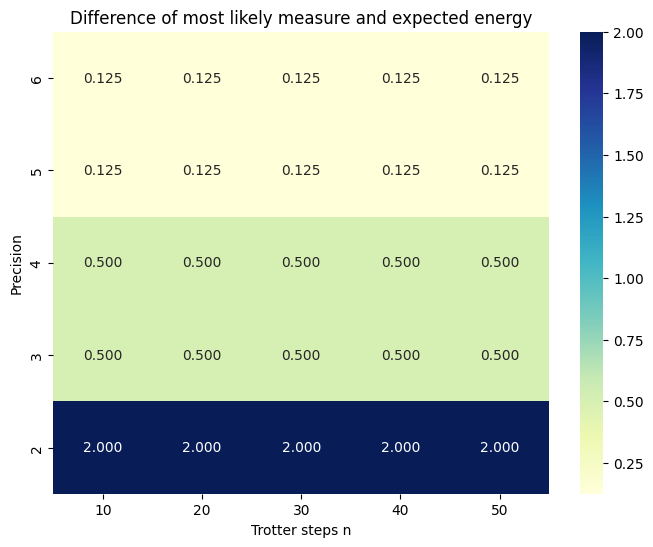

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))

sns.heatmap(np.abs(np.flipud(results_energy)-energy),xticklabels=range(10, 51, 10), yticklabels=range(6, 1, -1), cmap="YlGnBu", annot=True, fmt=".3f")
ax.set_xlabel("Trotter steps n")
ax.set_ylabel("Precision")
ax.set_title("Difference of most likely measure and expected energy")
plt.show()

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "heatmap_most.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')


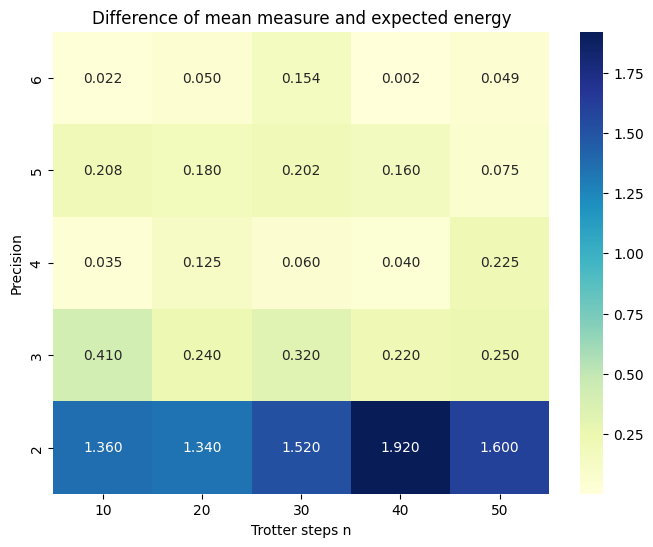

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))

sns.heatmap(np.abs(np.flipud(means_energy)-energy), xticklabels=range(10, 51, 10), yticklabels=range(6, 1, -1), cmap="YlGnBu", annot=True,fmt=".3f")
ax.set_xlabel("Trotter steps n")
ax.set_ylabel("Precision")
ax.set_title("Difference of mean measure and expected energy")
plt.show()

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "heatmap_mean.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')

# Figure 5.9

In [ ]:
L=2
u=8
tau=1
a=0

# Interaction part with the shifted potential
for i in range(L**2) :
    a+=(FermionOperator(f'{i}^ {i}')+FermionOperator('',-1/2))*(FermionOperator(f'{i+L**2}^ {i+L**2}')+FermionOperator('',-1/2))
a*=u

# Hopping part 
a+=FermionOperator('0^ 1', tau)
a+=FermionOperator('0^ 2', tau)
a+=FermionOperator('1^ 0', tau)
a+=FermionOperator('1^ 3', tau)
a+=FermionOperator('2^ 0', tau)
a+=FermionOperator('2^ 3', tau)
a+=FermionOperator('3^ 1', tau)
a+=FermionOperator('3^ 2', tau)
a+=FermionOperator('4^ 5', tau)
a+=FermionOperator('4^ 6', tau)
a+=FermionOperator('5^ 4', tau)
a+=FermionOperator('5^ 7', tau)
a+=FermionOperator('6^ 4', tau)
a+=FermionOperator('6^ 7', tau)
a+=FermionOperator('7^ 5', tau)
a+=FermionOperator('7^ 6', tau)

operator_mat_a = get_sparse_operator(a).toarray()
eigval_operator_a,eigvec_operator_a=np.linalg.eig(operator_mat_a)
# Round since most value are very slighty different
unique_a, counts_a = np.unique(eigval_operator_a.round(10), return_counts=True)
unique_a=np.real_if_close(unique_a)
counts_a=np.real_if_close(counts_a)
print("Unique eigenvalues of the model :")
print(unique_a)




# This way all of the angles will be "squished" into a smaller integer. It just need to be smaller than [-pi,pi]
t=(2*np.pi/20)


print(f'Emin = {np.min(eigval_operator_a).round(4)}, Emax = {np.max(eigval_operator_a).round(4)}, t={t}')

exp_mat_a = expm(-1j * t * operator_mat_a)
exp_mat_a = exp_mat_a.round(5)

eigval_exp_operator_a,eigvec_exp_operator_a=np.linalg.eig(exp_mat_a)



Unique eigenvalues of the model :
[-9.32023496 -8.98791841 -8.51367626 -8.47213596 -8.         -6.32455532
 -6.         -5.29150262 -4.         -3.46410162 -3.20775094 -2.82842712
 -2.21983253 -2.         -0.8065587  -0.47213595  0.          0.47213595
  0.8065587   2.          2.21983253  2.82842712  3.20775094  3.46410162
  4.          5.29150262  6.          6.32455532  8.          8.47213596
  8.51367626  8.98791841  9.32023496]
Emin = (-9.3202+0j), Emax = (9.3202+0j), t=0.3141592653589793


In [ ]:
# From e^it\lambda to e^i\theta
angles=np.angle(eigval_exp_operator_a)

# From [-pi,pi] to [0,2pi]
angles = np.mod(angles + 2 * np.pi, 2 * np.pi)
phases=(angles/(2*np.pi))

# Select an eigenstate of the system
i=5
state=eigvec_exp_operator_a[:,i]
expected=phases[i]

# We know that from previous test
energy=unique_a[4]

start_precision=2
start_trotter=20

trotter=start_trotter
precision=start_precision

counts= phase_estimation.single_phase_estimation_run(L,tau,u,-t,precision,state,step_plaq=1,trotter_step=trotter,shots=250,backend=AerSimulator(method="statevector"))
new_counts = {}
for measured_state, count in counts.items():
    decimal_key = int(measured_state, 2)/(2**precision)  # Convert binary string to decimal, and then to a number between 0 and 1
    new_counts[decimal_key] = count
total_counts = sum(new_counts.values())
ref_mean = sum(value * count for value, count in new_counts.items()) / total_counts
ref_most_likely_measure=max(new_counts, key=new_counts.get)
ref_mean=2*np.pi*ref_mean/t if ref_mean < 0.5 else 2*np.pi*(ref_mean-1)/t
ref_most=2*np.pi*ref_most_likely_measure/t if ref_most_likely_measure < 0.5 else 2*np.pi*(ref_most_likely_measure-1)/t

means_a=[]
means_n=[]
most_a=[]
most_n=[]
trotters_a=[]
trotters_n=[]
precisions_a=[]
precisions_n=[]
for i in range(5) :
    print("-----------------")
    print(f'Precision : {precision}, Trotter steps : {trotter} ')
    # Inscreasing precision
    precision+=1
    counts= phase_estimation.single_phase_estimation_run(L,tau,u,-t,precision,state,step_plaq=1,trotter_step=trotter,shots=250,backend=AerSimulator(method="statevector"))
    new_counts = {}
    for measured_state, count in counts.items():
        decimal_key = int(measured_state, 2)/(2**precision)  # Convert binary string to decimal, and then to a number between 0 and 1
        new_counts[decimal_key] = count
    total_counts = sum(new_counts.values())
    mean_a = sum(value * count for value, count in new_counts.items()) / total_counts
    most_likely_measure_a=max(new_counts, key=new_counts.get)

    measured_energy_a=2*np.pi*most_likely_measure_a/t if most_likely_measure_a < 0.5 else 2*np.pi*(most_likely_measure_a-1)/t
    mean_a=2*np.pi*mean_a/t if mean_a < 0.5 else 2*np.pi*(mean_a-1)/t

    means_a.append(mean_a)
    most_a.append(measured_energy_a)
    trotters_a.append(trotter)
    precisions_a.append(precision)
    
    print(f'If increasing the precision of PE : Phase measured = {most_likely_measure_a}, Measured energy = {measured_energy_a}, Mean = {mean_a}')
    precision-=1

    # Increasing n
    tmp_trotter=int(np.floor((2**(precision+1)*trotter-trotter+0.25)/(2**precision-1)))
    counts= phase_estimation.single_phase_estimation_run(L,tau,u,-t,precision,state,step_plaq=1,trotter_step=tmp_trotter,shots=250,backend=AerSimulator(method="statevector"))
    new_counts = {}
    for measured_state, count in counts.items():
        decimal_key = int(measured_state, 2)/(2**precision)  # Convert binary string to decimal, and then to a number between 0 and 1
        new_counts[decimal_key] = count
    total_counts = sum(new_counts.values())
    mean_n = sum(value * count for value, count in new_counts.items()) / total_counts
    most_likely_measure_n=max(new_counts, key=new_counts.get)

    measured_energy_n=2*np.pi*most_likely_measure_n/t if most_likely_measure_n < 0.5 else 2*np.pi*(most_likely_measure_n-1)/t
    mean_n=2*np.pi*mean_n/t if mean_n < 0.5 else 2*np.pi*(mean_n-1)/t

    means_n.append(mean_n)
    most_n.append(measured_energy_n)
    precisions_n.append(precision)
    trotters_n.append(tmp_trotter)
    
    print(f'If increasing the number of Trotter steps : Phase measured = {most_likely_measure_n}, Measured energy = {measured_energy_n}, Mean = {mean_n}')

    if most_likely_measure_n == most_likely_measure_a :
            if np.abs(mean_a-energy) > np.abs(mean_n-energy) :
                print(" Trotter wins (from the mean) ")
                trotter=tmp_trotter
            else :
                print(" Precision wins (from the mean) ")
                precision+=1
    else :
        if np.abs(measured_energy_a-energy) > np.abs(measured_energy_n-energy) :
            print(" Trotter wins ")
            trotter=tmp_trotter
        else :
            print(" Precision wins ")
            precision+=1



-----------------
Precision : 2, Trotter steps : 20 
If increasing the precision of PE : Phase measured = 0.625, Measured energy = -7.5, Mean = -7.91
If increasing the number of Trotter steps : Phase measured = 0.5, Measured energy = -10.0, Mean = -9.700000000000001
 Precision wins 
-----------------
Precision : 3, Trotter steps : 20 
If increasing the precision of PE : Phase measured = 0.625, Measured energy = -7.5, Mean = -8.38
If increasing the number of Trotter steps : Phase measured = 0.625, Measured energy = -7.5, Mean = -7.74
 Trotter wins (from the mean) 
-----------------
Precision : 3, Trotter steps : 42 
If increasing the precision of PE : Phase measured = 0.625, Measured energy = -7.5, Mean = -8.045
If increasing the number of Trotter steps : Phase measured = 0.625, Measured energy = -7.5, Mean = -7.86
 Precision wins (from the mean) 
-----------------
Precision : 4, Trotter steps : 42 
If increasing the precision of PE : Phase measured = 0.59375, Measured energy = -8.125, 

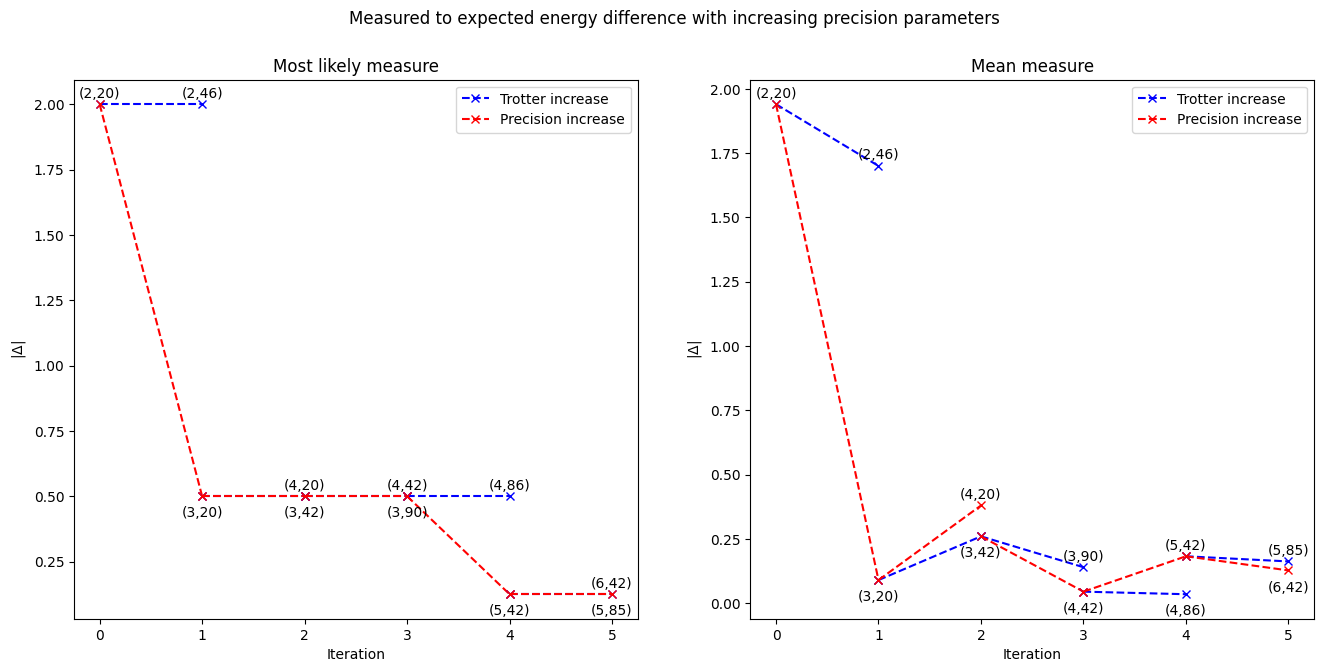

In [ ]:
ref_mean_dif=np.abs(ref_mean-energy)
ref_most_dif=np.abs(ref_most-energy)

means_n_dif=np.abs(means_n-energy)
means_a_dif=np.abs(means_a-energy)

most_n_dif=np.abs(most_n-energy)
most_a_dif=np.abs(most_a-energy)
fig, ax = plt.subplots(1, 2,figsize=(16, 7))

fig.suptitle('Measured to expected energy difference with increasing precision parameters')

a=start_precision
n=start_trotter

ax[0].plot([0,1], [ref_most_dif,most_n_dif[0]],'--',marker='x', color='blue', label='Trotter increase')
ax[0].plot([0,1], [ref_most_dif,most_a_dif[0]],'--',marker='x', color='red', label='Precision increase')
ax[0].annotate(f"({a},{n})", (0, ref_most_dif), textcoords="offset points", xytext=(0, 5), ha='center')
ax[0].annotate(f"({a},{trotters_n[0]})", (1, most_n_dif[0]), textcoords="offset points", xytext=(0, 5), ha='center')
ax[0].annotate(f"({precisions_a[0]},{n})", (1, most_a_dif[0]), textcoords="offset points", xytext=(0, -15), ha='center')
for i in range(len(precisions_a)-1) :
    previous=min(most_n_dif[i],most_a_dif[i])
    ax[0].plot([i+1,i+2], [previous,most_n_dif[i+1]],'--',marker='x', color='blue')
    ax[0].plot([i+1,i+2], [previous,most_a_dif[i+1]],'--',marker='x', color='red')

ax[0].set_ylabel(r'$|\Delta |$')
ax[0].set_xlabel('Iteration')
ax[0].set_title('Most likely measure')
ax[0].legend()

ax[1].plot([0,1], [ref_mean_dif,means_n_dif[0]],'--',marker='x', color='blue', label='Trotter increase')
ax[1].plot([0,1], [ref_mean_dif,means_a_dif[0]],'--',marker='x', color='red', label='Precision increase')
ax[1].annotate(f"({a},{n})", (0, ref_mean_dif), textcoords="offset points", xytext=(0, 5), ha='center')
ax[1].annotate(f"({a},{trotters_n[0]})", (1, means_n_dif[0]), textcoords="offset points", xytext=(0, 5), ha='center')
ax[1].annotate(f"({precisions_a[0]},{n})", (1, means_a_dif[0]), textcoords="offset points", xytext=(0, -15), ha='center')
for i in range(len(precisions_a)-1) :
    if most_n_dif[i]>most_a_dif[i] :
        previous = means_a_dif[i]
    if most_n_dif[i]<most_a_dif[i] :
        previous=means_n_dif[i]
    if most_n_dif[i]==most_a_dif[i] :
        previous=min(means_n_dif[i],means_a_dif[i])
    ax[1].plot([i+1,i+2], [previous,means_n_dif[i+1]],'--',marker='x', color='blue')
    ax[1].plot([i+1,i+2], [previous,means_a_dif[i+1]],'--',marker='x', color='red')
    
    
ax[1].set_ylabel(r'$|\Delta |$')
ax[1].set_xlabel('Iteration')
ax[1].set_title('Mean measure')
ax[1].legend()


for i in range(len(precisions_a)-1) :
    if most_n_dif[i+1]>most_a_dif[i+1] :
        y_most_n= 5
        y_most_a= -15
    else :
        y_most_n= -15
        y_most_a= 5
    if means_n_dif[i+1]>means_a_dif[i+1] :
        y_mean_n= 5
        y_mean_a= -15
    else :
        y_mean_n= -15
        y_mean_a= 5
    ax[0].annotate(f"({precisions_n[i+1]},{trotters_n[i+1]})", (i+2, most_n_dif[i+1]), textcoords="offset points", xytext=(0, y_most_n), ha='center')
    ax[0].annotate(f"({precisions_a[i+1]},{trotters_a[i+1]})", (i+2, most_a_dif[i+1]), textcoords="offset points", xytext=(0, y_most_a), ha='center')
    ax[1].annotate(f"({precisions_n[i+1]},{trotters_n[i+1]})", (i+2, means_n_dif[i+1]), textcoords="offset points", xytext=(0, y_mean_n), ha='center')
    ax[1].annotate(f"({precisions_a[i+1]},{trotters_a[i+1]})", (i+2, means_a_dif[i+1]), textcoords="offset points", xytext=(0, y_mean_a), ha='center')

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "a_or_n.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')



# Figure 5.10

In [9]:
# Fitting a curve
def power_law(x, C, k):
    return C * x**k


C_fros=[] 
k_fros=[]
C_fids=[]
k_fids=[]
u_values=[]
for u in [1,2,3,4,5,6,7,8,9,10] :
    L=2
    tau=1
    t=-1

    a=0

    # Interaction part with the shifted potential
    for i in range(L**2) :
        a+=(FermionOperator(f'{i}^ {i}')+FermionOperator('',-1/2))*(FermionOperator(f'{i+L**2}^ {i+L**2}')+FermionOperator('',-1/2))
    a*=u

    # Hopping part 
    a+=FermionOperator('0^ 1', tau)
    a+=FermionOperator('0^ 2', tau)
    a+=FermionOperator('1^ 0', tau)
    a+=FermionOperator('1^ 3', tau)
    a+=FermionOperator('2^ 0', tau)
    a+=FermionOperator('2^ 3', tau)
    a+=FermionOperator('3^ 1', tau)
    a+=FermionOperator('3^ 2', tau)
    a+=FermionOperator('4^ 5', tau)
    a+=FermionOperator('4^ 6', tau)
    a+=FermionOperator('5^ 4', tau)
    a+=FermionOperator('5^ 7', tau)
    a+=FermionOperator('6^ 4', tau)
    a+=FermionOperator('6^ 7', tau)
    a+=FermionOperator('7^ 5', tau)
    a+=FermionOperator('7^ 6', tau)

    operator_mat_a = get_sparse_operator(a).toarray()
    # Computing e^itK

    exp_mat_a = expm(1j * t * operator_mat_a)



    fro_norms=[]
    fidelities=[]

    n_values = []
    for n in range(10,31,10) :
        # Definition of the circuit
        qc = QuantumCircuit(8)

        qc.append(custom_gate.hubbard_unitary(L,tau,u,t,step_plaq=1,trotter_step=n,r=1,k=0,n=0,controlled=False), list(range(8)))

        # Getting the operator
        op = qi.Operator(qc)
        circuit_mat_a=op.data

        fro= np.linalg.norm((circuit_mat_a-exp_mat_a), 'fro')
        fid=1-(1/np.shape(circuit_mat_a)[0])*np.abs(np.trace(np.matmul(np.transpose(np.conjugate(circuit_mat_a)),exp_mat_a)))

        n_values.append(n)
        fro_norms.append(fro)
        fidelities.append(fid)


    popt_fro, _ = curve_fit(power_law, n_values, fro_norms)
    C_fro, k_fro = popt_fro

    popt_fid, _ = curve_fit(power_law, n_values, fidelities)
    C_fid, k_fid = popt_fid

    C_fros.append(C_fro)
    k_fros.append(k_fro)
    C_fids.append(C_fid)
    k_fids.append(k_fid)
    u_values.append(u)





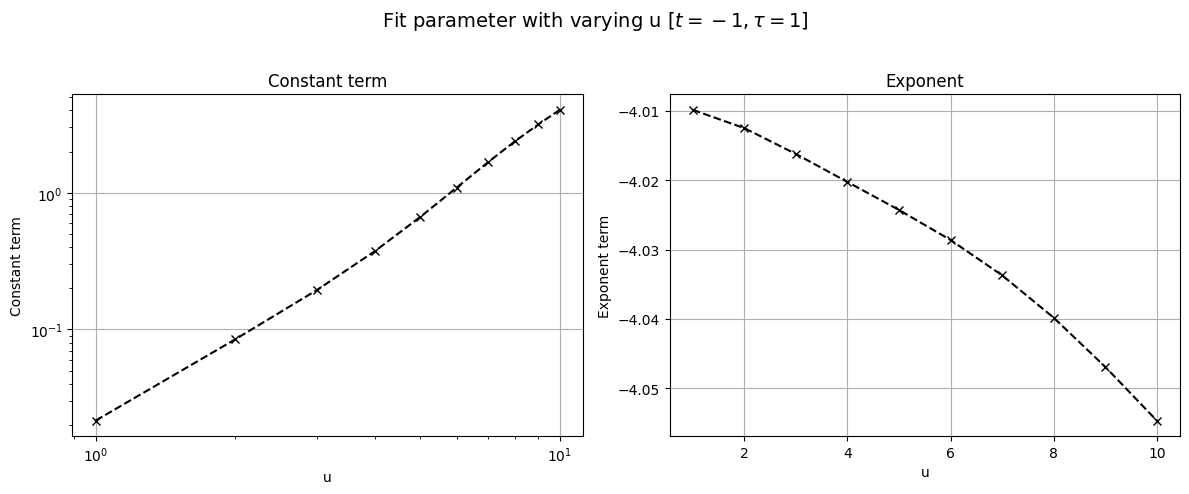

In [10]:
# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(u_values, C_fids, '--', marker='x', color='black')
ax1.set_xlabel("u")
ax1.set_ylabel("Constant term")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.tick_params(axis='y')
ax1.grid()
ax1.set_title("Constant term")



ax2.plot(u_values, k_fids, '--', marker='x', color='black')
ax2.set_xlabel("u")
ax2.set_ylabel("Exponent term")
ax2.tick_params(axis='y')
ax2.grid()
ax2.set_title("Exponent")


fig.suptitle(fr'Fit parameter with varying u $[t={t},\tau={tau}]$', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "fit_param_u.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')


# Figure 5.11

In [11]:
# Fitting a curve
def power_law(x, C, k):
    return C * x**k


C_fros=[] 
k_fros=[]
C_fids=[]
k_fids=[]
tau_values=[]
for tau in [1,2,3,4,5,6,7,8,9,10] :
    L=2
    u=8
    t=-1

    a=0

    # Interaction part with the shifted potential
    for i in range(L**2) :
        a+=(FermionOperator(f'{i}^ {i}')+FermionOperator('',-1/2))*(FermionOperator(f'{i+L**2}^ {i+L**2}')+FermionOperator('',-1/2))
    a*=u

    # Hopping part 
    a+=FermionOperator('0^ 1', tau)
    a+=FermionOperator('0^ 2', tau)
    a+=FermionOperator('1^ 0', tau)
    a+=FermionOperator('1^ 3', tau)
    a+=FermionOperator('2^ 0', tau)
    a+=FermionOperator('2^ 3', tau)
    a+=FermionOperator('3^ 1', tau)
    a+=FermionOperator('3^ 2', tau)
    a+=FermionOperator('4^ 5', tau)
    a+=FermionOperator('4^ 6', tau)
    a+=FermionOperator('5^ 4', tau)
    a+=FermionOperator('5^ 7', tau)
    a+=FermionOperator('6^ 4', tau)
    a+=FermionOperator('6^ 7', tau)
    a+=FermionOperator('7^ 5', tau)
    a+=FermionOperator('7^ 6', tau)

    operator_mat_a = get_sparse_operator(a).toarray()
    # Computing e^itK

    exp_mat_a = expm(1j * t * operator_mat_a)



    fro_norms=[]
    fidelities=[]

    n_values = []
    for n in range(10,31,10) :
        # Definition of the circuit
        qc = QuantumCircuit(8)

        qc.append(custom_gate.hubbard_unitary(L,tau,u,t,step_plaq=1,trotter_step=n,r=1,k=0,n=0,controlled=False), list(range(8)))

        # Getting the operator
        op = qi.Operator(qc)
        circuit_mat_a=op.data

        fro= np.linalg.norm((circuit_mat_a-exp_mat_a), 'fro')
        fid=1-(1/np.shape(circuit_mat_a)[0])*np.abs(np.trace(np.matmul(np.transpose(np.conjugate(circuit_mat_a)),exp_mat_a)))

        n_values.append(n)
        fro_norms.append(fro)
        fidelities.append(fid)


    popt_fro, _ = curve_fit(power_law, n_values, fro_norms)
    C_fro, k_fro = popt_fro

    popt_fid, _ = curve_fit(power_law, n_values, fidelities)
    C_fid, k_fid = popt_fid

    C_fros.append(C_fro)
    k_fros.append(k_fro)
    C_fids.append(C_fid)
    k_fids.append(k_fid)
    tau_values.append(tau)





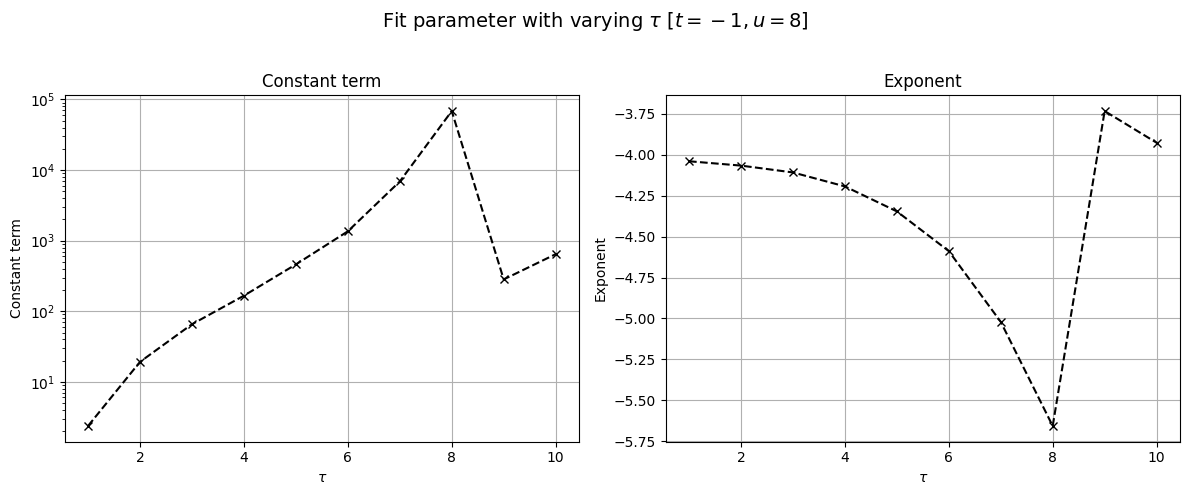

In [12]:
# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(tau_values, C_fids, '--', marker='x', color='black')
ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel("Constant term")
ax1.set_yscale("log")
ax1.tick_params(axis='y')
ax1.grid()
ax1.set_title("Constant term")



ax2.plot(tau_values, k_fids, '--', marker='x', color='black')
ax2.set_xlabel(r'$\tau$')
ax2.set_ylabel("Exponent")
ax2.tick_params(axis='y')
ax2.grid()
ax2.set_title("Exponent")


fig.suptitle(fr'Fit parameter with varying $\tau$ $[t={t}, u={u}]$', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "fit_param_tau.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')


# Figure 5.12

L= 2 :
{'h': 256, 'cx': 168, 's': 112, 'rz': 36, 'swap': 32, 'cz': 32, 'tdg': 32, 't': 32, 'Fswap': 16, 'sdg': 16}
L= 4 :
{'h': 3072, 'cx': 1696, 's': 1344, 'Fswap': 480, 'swap': 384, 'cz': 384, 'tdg': 384, 't': 384, 'rz': 272, 'sdg': 192}
L= 6 :
{'h': 6912, 'cx': 3816, 's': 3024, 'Fswap': 1200, 'swap': 864, 'cz': 864, 'tdg': 864, 't': 864, 'rz': 612, 'sdg': 432}
L= 8 :
{'h': 12288, 'cx': 6784, 's': 5376, 'Fswap': 2176, 'swap': 1536, 'cz': 1536, 'tdg': 1536, 't': 1536, 'rz': 1088, 'sdg': 768}
L= 10 :
{'h': 19200, 'cx': 10600, 's': 8400, 'Fswap': 3952, 'swap': 2400, 'cz': 2400, 'tdg': 2400, 't': 2400, 'rz': 1700, 'sdg': 1200}


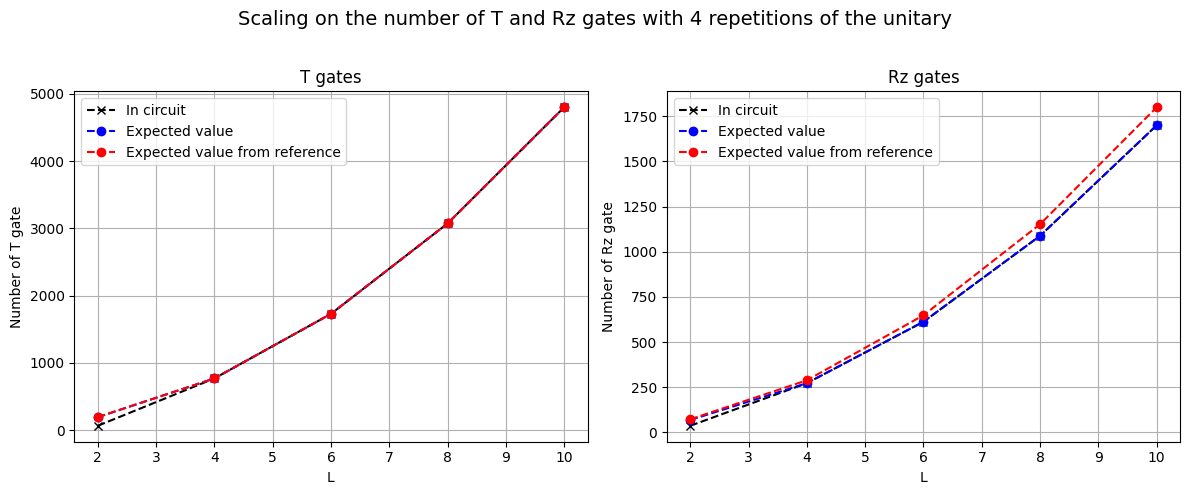

In [2]:
u=8
tau=1
t=1
r=4
m=1
n=1
T_counts=[]
RZ_counts=[]
L_values=[]
for L in [2,4,6,8,10] :
    qc_a = QuantumCircuit(2*L**2)

    qc_a.append(custom_gate.hubbard_unitary(L,tau,u,t,step_plaq=m,trotter_step=n,r=r,k=0,n=0,controlled=False), list(range(2*L**2)))
    decomposed=qc_a.decompose().decompose(gates_to_decompose=['H_h','H_I']).decompose(gates_to_decompose=['H_h,g','H_h,p']).decompose(gates_to_decompose=['Single plaquette']).decompose(gates_to_decompose=['F_{2,4}','F_{3,1}'])

    gate_counts=dict(decomposed.count_ops())
    print(f'L= {L} :')
    print(gate_counts)
    T_counts.append(gate_counts.get('t',0)+gate_counts.get('tdg',0))
    RZ_counts.append(gate_counts.get('rz'))
    L_values.append(L)
        

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(L_values, T_counts, '--', marker='x', color='black', label='In circuit')
ax1.plot(L_values, (8*m*n*r+4*n*r)*np.power(np.array(L_values),2), '--', marker='o', color='blue', label='Expected value')
ax1.plot(L_values, (3*4*r)*np.power(np.array(L_values),2), '--', marker='o', color='red', label='Expected value from reference')
ax1.set_xlabel('L')
ax1.set_ylabel("Number of T gate")
ax1.grid()
ax1.set_title("T gates")
ax1.legend()

ax2.plot(L_values, RZ_counts, '--', marker='x', color='black', label='In circuit')
ax2.plot(L_values, (2*m*n*r+2*m*r+1)*np.power(np.array(L_values),2), '--', marker='o', color='blue', label='Expected value')
ax2.plot(L_values, (4*r+2)*np.power(np.array(L_values),2), '--', marker='o', color='red', label='Expected value from reference')
ax2.set_xlabel('L')
ax2.set_ylabel("Number of Rz gate")
ax2.grid()
ax2.set_title("Rz gates")
ax2.legend()


fig.suptitle('Scaling on the number of T and Rz gates with 4 repetitions of the unitary', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "rz_t_number.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')

# Figure 5.13

L= 4 :
{'Fswap': 16, 'Single plaquette': 4}
{'Fswap': 28, 'Single plaquette': 4}
L= 6 :
{'Fswap': 42, 'Single plaquette': 9}
{'Fswap': 66, 'Single plaquette': 9}
L= 8 :
{'Fswap': 80, 'Single plaquette': 16}
{'Fswap': 112, 'Single plaquette': 16}
L= 10 :
{'Fswap': 150, 'Single plaquette': 25}
{'Fswap': 194, 'Single plaquette': 25}


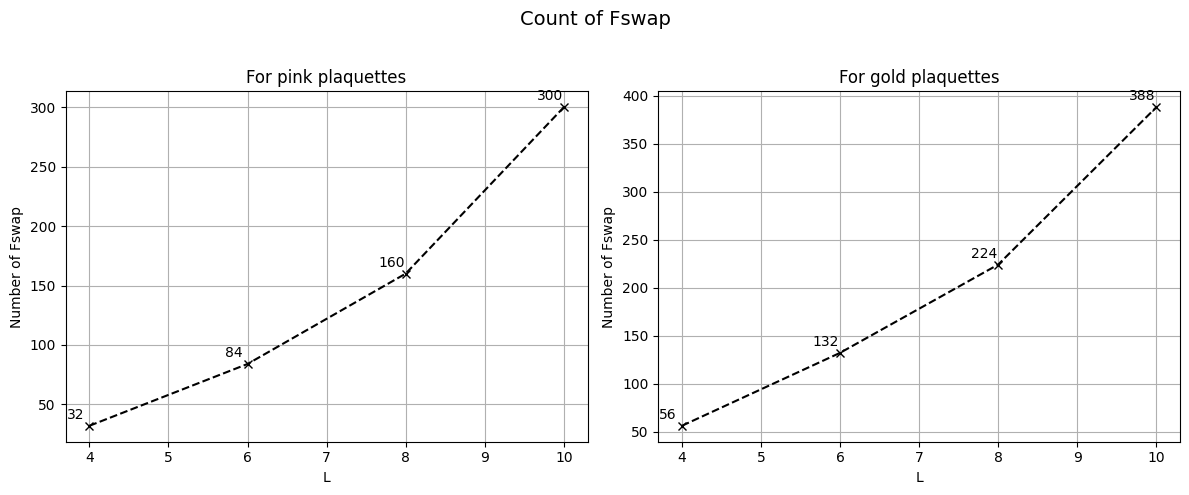

In [16]:
u=8
tau=1
t=1
r=1
m=1
n=1
Fswap_counts_p=[]
Fswap_counts_g=[]
L_values=[]
for L in [4,6,8,10] :
    qc_a = QuantumCircuit(L**2)

    qc_a.append(custom_gate.hopping_plaquettes(L,tau,t,"pink",controlled=False), list(range(L**2)))
    decomposed_a=qc_a.decompose()

    gate_counts_p=dict(decomposed_a.count_ops())

    qc_b = QuantumCircuit(2*L**2)

    qc_b.append(custom_gate.hopping_plaquettes(L,tau,t,"gold",controlled=False), list(range(L**2)))
    decomposed_b=qc_b.decompose()

    gate_counts_g=dict(decomposed_b.count_ops())
    print(f'L= {L} :')
    print(gate_counts_p)
    print(gate_counts_g)

    # times 2 since this is only for a single spin
    Fswap_counts_p.append(2*gate_counts_p.get('Fswap'))
    Fswap_counts_g.append(2*gate_counts_g.get('Fswap'))
    L_values.append(L)
    

# Plots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(L_values, Fswap_counts_p, '--', marker='x', color='black')
ax1.set_xlabel('L')
ax1.set_ylabel("Number of Fswap")
ax1.grid()
ax1.set_title("For pink plaquettes")

for x, y in zip(L_values, Fswap_counts_p):
    ax1.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(-10, 5), ha='center')

ax2.plot(L_values, Fswap_counts_g, '--', marker='x', color='black')
ax2.set_xlabel('L')
ax2.set_ylabel("Number of Fswap")
ax2.grid()
ax2.set_title("For gold plaquettes")

for x, y in zip(L_values, Fswap_counts_g):
    ax2.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(-10, 5), ha='center')


fig.suptitle('Count of Fswap', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", "fswap_number.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')

# Figure 5.14

In [2]:
L=2
u=8
tau=1
a=0

# Interaction part with the shifted potential
for i in range(L**2) :
    a+=(FermionOperator(f'{i}^ {i}')+FermionOperator('',-1/2))*(FermionOperator(f'{i+L**2}^ {i+L**2}')+FermionOperator('',-1/2))
a*=u

# Hopping part 
a+=FermionOperator('0^ 1', tau)
a+=FermionOperator('0^ 2', tau)
a+=FermionOperator('1^ 0', tau)
a+=FermionOperator('1^ 3', tau)
a+=FermionOperator('2^ 0', tau)
a+=FermionOperator('2^ 3', tau)
a+=FermionOperator('3^ 1', tau)
a+=FermionOperator('3^ 2', tau)
a+=FermionOperator('4^ 5', tau)
a+=FermionOperator('4^ 6', tau)
a+=FermionOperator('5^ 4', tau)
a+=FermionOperator('5^ 7', tau)
a+=FermionOperator('6^ 4', tau)
a+=FermionOperator('6^ 7', tau)
a+=FermionOperator('7^ 5', tau)
a+=FermionOperator('7^ 6', tau)

operator_mat_a = get_sparse_operator(a).toarray()
eigval_operator_a,eigvec_operator_a=np.linalg.eig(operator_mat_a)
unique_a, counts_a = np.unique(eigval_operator_a.round(5), return_counts=True)
print("Unique eigenvalues of the model :")
print(np.real_if_close(unique_a))

# This is the smart way that would truly map t*lamba to -pi, pi if Emmin=-Emax, but we just need the divisor to be big enought 
t=2*np.pi/np.real(np.max(eigval_operator_a)-np.min(eigval_operator_a)).round(4)

# This way all of the angles will be "squished" into a smaller integer. It just need to be smaller than [-pi,pi]
t=(2*np.pi/20)


print(f'Emin = {np.min(eigval_operator_a).round(4)}, Emax = {np.max(eigval_operator_a).round(4)}, t={t}')

exp_mat_a = expm(-1j * t * operator_mat_a)
exp_mat_a = exp_mat_a.round(5)

eigval_exp_operator_a,eigvec_exp_operator_a=np.linalg.eig(exp_mat_a)

Unique eigenvalues of the model :
[-9.32023 -8.98792 -8.51368 -8.47214 -8.      -6.32456 -6.      -5.2915
 -4.      -3.4641  -3.20775 -2.82843 -2.21983 -2.      -0.80656 -0.47214
  0.       0.47214  0.80656  2.       2.21983  2.82843  3.20775  3.4641
  4.       5.2915   6.       6.32456  8.       8.47214  8.51368  8.98792
  9.32023]
Emin = (-9.3202+0j), Emax = (9.3202+0j), t=0.3141592653589793


3  :
{'010': 15, '000': 12, '001': 16, '100': 14, '111': 12, '101': 15, '110': 6, '011': 10}
{0.25: 15, 0.0: 12, 0.125: 16, 0.5: 14, 0.875: 12, 0.625: 15, 0.75: 6, 0.375: 10}
Mean: 0.40875 Variance: 0.0780796875
4  :
{'0100': 12, '1011': 9, '0010': 9, '0110': 6, '0011': 1, '1100': 7, '1110': 7, '1001': 4, '0000': 6, '1000': 8, '0001': 4, '1101': 5, '1010': 5, '1111': 6, '0101': 5, '0111': 6}
{0.25: 12, 0.6875: 9, 0.125: 9, 0.375: 6, 0.1875: 1, 0.75: 7, 0.875: 7, 0.5625: 4, 0.0: 6, 0.5: 8, 0.0625: 4, 0.8125: 5, 0.625: 5, 0.9375: 6, 0.3125: 5, 0.4375: 6}
Mean: 0.47625 Variance: 0.0808421875


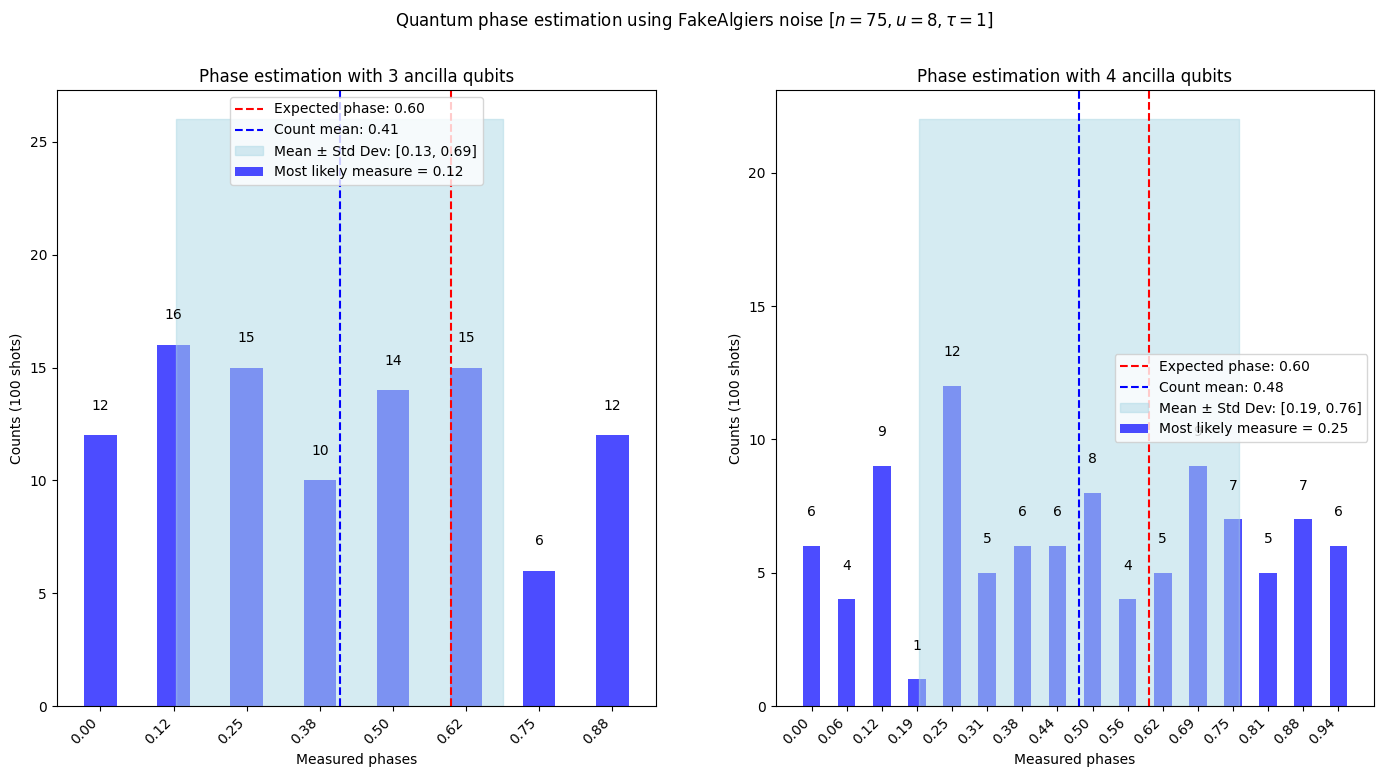

In [3]:
# From e^it\lambda to e^i\theta
angles=np.angle(eigval_exp_operator_a)

# From [-pi,pi] to [0,2pi]
angles = np.mod(angles + 2 * np.pi, 2 * np.pi)
phases=(angles/(2*np.pi))

# Setting a backend with its associated noise 

device_backend = FakeAlgiers()
simulator = AerSimulator.from_backend(device_backend)

# Select an eigenstate of the system
i=5
state=eigvec_exp_operator_a[:,i]
expected=phases[i]
trotter_steps=75
fig, axes = plt.subplots(1, 2,figsize=(17, 8))
fig.suptitle(fr'Quantum phase estimation using FakeAlgiers noise $[n={trotter_steps}, u={u}, \tau={tau}]$')

for k,precision in enumerate(range(3,5)) :
    print(precision, ' :')

    counts= phase_estimation.single_phase_estimation_run(L,tau,u,-t,precision,state,step_plaq=1,trotter_step=trotter_steps,shots=100,backend=simulator)
    new_counts = {}
    for measured_state, count in counts.items():
        decimal_key = int(measured_state, 2)/(2**precision)  # Convert binary string to decimal, and then to a number between 0 and 1
        new_counts[decimal_key] = count
    # For clarity
    print(counts)
    print(new_counts)
    total_counts = sum(new_counts.values())
    mean = sum(value * count for value, count in new_counts.items()) / total_counts
    variance = sum(((value - mean)**2) * count for value, count in new_counts.items()) / total_counts
    print("Mean:", mean, "Variance:", variance)

    bar_positions = list(new_counts.keys())
    bar_heights = list(new_counts.values()) 
    bar_width = 1/(2*precision**2)

    bars = axes[k].bar(bar_positions, bar_heights, width=bar_width, color='blue', alpha=0.7,label=f'Most likely measure = {max(new_counts, key=new_counts.get):.2f}')
    for bar, count in zip(bars, bar_heights):
        axes[k].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count), ha='center', va='bottom', fontsize=10)

    axes[k].axvline(x=expected, color='red', linestyle='--', linewidth=1.5, label=f"Expected phase: {expected:.2f}")
    axes[k].axvline(x=mean, color='blue', linestyle='--', linewidth=1.5, label=f"Count mean: {mean:.2f}")

    lower = max(mean - variance**0.5,0)
    upper = min(mean + variance**0.5,1)
    axes[k].fill_between([lower,upper],0,max(bar_heights) + 10,color='lightblue',alpha=0.5,label=f"Mean ± Std Dev: [{lower:.2f}, {upper:.2f}]")

    axes[k].set_xticks(bar_positions)
    axes[k].set_xticklabels([f"{pos:.2f}" for pos in bar_positions],rotation=45, ha='right') 


    axes[k].set_xlabel('Measured phases')
    axes[k].set_ylabel('Counts (100 shots)')
    axes[k].legend(loc='best')
    axes[k].set_title(f'Phase estimation with {precision} ancilla qubits')

plt.show()


os.makedirs("Figures", exist_ok=True)
file_path = os.path.join("figures", f"phase_estimation_noisy_{trotter_steps}.png")
fig.savefig(file_path,dpi=300, bbox_inches='tight')